In [3]:
import os
import seaborn as sns
import pandas as pd
import random
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

In [3]:
interations = 10000
bias_type = 'random_A_B'
csv_file = f'/home/diego.moreira/FairPIVARA/results/dimensions_removed/pt-br_results_in_csv_{bias_type}_{interations}.csv'

In [4]:
pares = 20
original_values = np.array([1.4252794981002808, 0.9186360239982605, -1.0560377836227417, -0.9705951809883118, -0.5649810433387756, -1.0659263134002686, 0.5286650061607361, -0.13093699514865875, -0.653122067451477, 0.7998924255371094, -0.0035296129062771797, -1.655595064163208, -1.5960325002670288, -0.725359320640564, -1.710771918296814, -1.6722334623336792, -1.5765864849090576, -1.5342515707015991, -0.18285144865512848, -1.334985613822937])

<Axes: xlabel='e', ylabel='Count'>

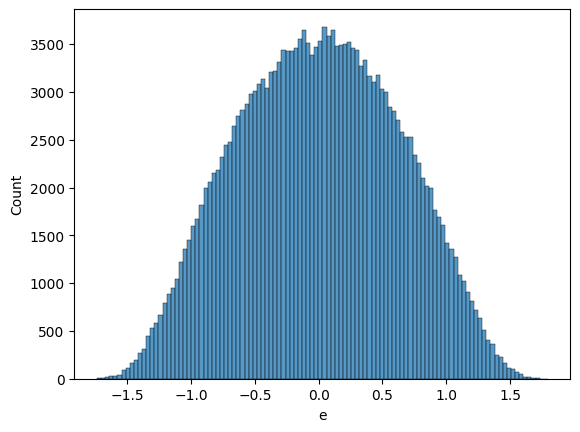

In [6]:
#Plot de todos os valores de bias 'e'
df = pd.read_csv(csv_file)
sns.histplot(data=df,x='e')

<Axes: ylabel='Count'>

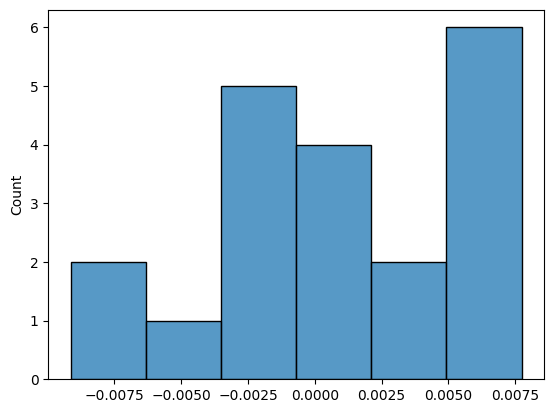

In [7]:
mean_e_per_concept_geral = [0] * pares
sum = 0
for i in range(len(df)):
    mean_e_per_concept_geral[i % pares] += df['e'][i]  
mean_e_per_concept_geral = [x / interations for x in mean_e_per_concept_geral]
sns.histplot(data=mean_e_per_concept_geral,stat='count')

<Axes: ylabel='Count'>

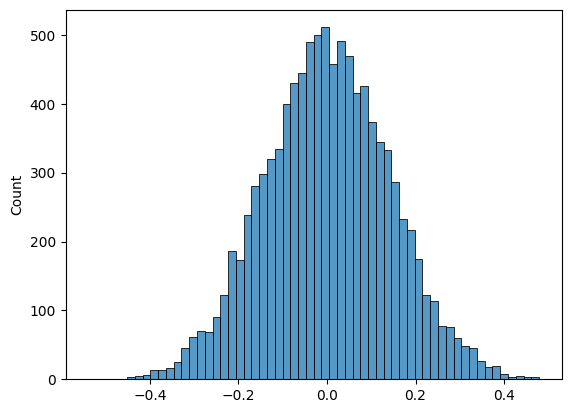

In [8]:
mean_e = []
for i in range(0,len(df),pares):
    mean_e.append(df.iloc[i:i+pares,-1:].values.squeeze().mean())
sns.histplot(data=mean_e,stat='count')

<Axes: ylabel='Count'>

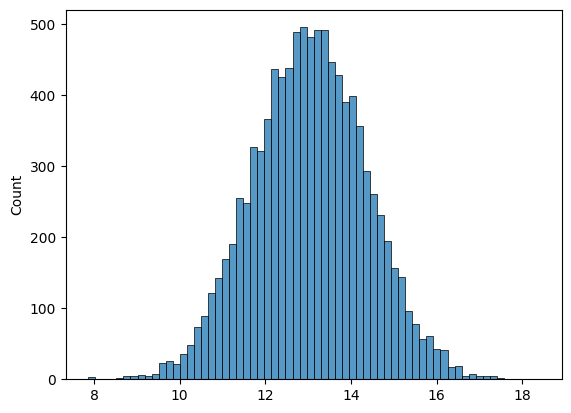

In [9]:
sum_e = []
for i in range(0,len(df),pares):
    sum_e.append(abs(abs(original_values)-abs(df.iloc[i:i+pares,-1:].values.squeeze())).sum())
sns.histplot(data=sum_e,stat='count')

In [10]:
print(f'Média de redução do Bias: {np.mean(sum_e)},{np.std(sum_e)}')

Média de redução do Bias: 13.035287625834235,1.3247877121563307


In [11]:
for concept_value in df:
    print(f'{concept_value}: {np.mean(df[concept_value])}')

# Violin Plots

## Original CLIP

In [60]:
user = os.environ.get('USER', os.environ.get('USERNAME'))
task='classification'
score_or_quant='both'
extract_top_similar='15'
view_top_similar=''
language='pt-br' # '' for english, 'pt-br' for portuguese
remove_dimensions_list=''
repetitions='1'
bias_type='same_as_X'

if remove_dimensions_list!='':
    removed_dimensions = remove_dimensions_list.split('/')[-1]

csv_file = f'/home/{user}/FairPIVARA/results/violin/Enviroment:language-{language},task-{task},score_or_quant-{score_or_quant},extract_top_similar-{extract_top_similar},view_top_similar-{view_top_similar},remove_dimensions_list-{remove_dimensions_list},repetitions-{repetitions},bias_type-{bias_type}'

In [61]:
df = pd.read_csv(csv_file)

In [62]:
df['Score/Quant'] = df['Score']/abs(df['Quant'])
df['ScoreNorm'] = 2*((df['Score']-min(df['Score']))/(max(df['Score'])-min(df['Score'])))-1
df['Concept'] = df['Concept'].str.replace('humano','')

In [63]:
df

Global Concept      Micro Concept       Concept  Quant      Score  \
0             Disability  Mental Disability        triste   -218 -42.345798   
1             Disability  Mental Disability    preocupado   -214 -39.661633   
2             Disability  Mental Disability       infeliz   -199 -36.508099   
3             Disability  Mental Disability        agonia   -169 -29.385258   
4             Disability  Mental Disability   descontente   -157 -27.502116   
...                  ...                ...           ...    ...        ...   
1455  Sexual Orientation               LGBT     abençoado    112  15.840439   
1456  Sexual Orientation               LGBT     carinhoso    112  16.503941   
1457  Sexual Orientation               LGBT           paz    117  17.355918   
1458  Sexual Orientation               LGBT      gracioso    123  17.893003   
1459  Sexual Orientation               LGBT       alegria    146  21.021174   

      Score/Quant  ScoreNorm  
0       -0.194247  -1.000000  
1       -0.185335  -0.937519  
2       -0.183458  -0.864113  
3       -0.173877  -0.698311  
4       -0.175173  -0.654476  
...           ...        ...  
1455     0.141432   0.354432  
1456     0.147357   0.369877  
1457     0.148341   0.389709  
1458     0.145472   0.402211  
1459     0.143981   0.475027  

[1460 rows x 7 columns]

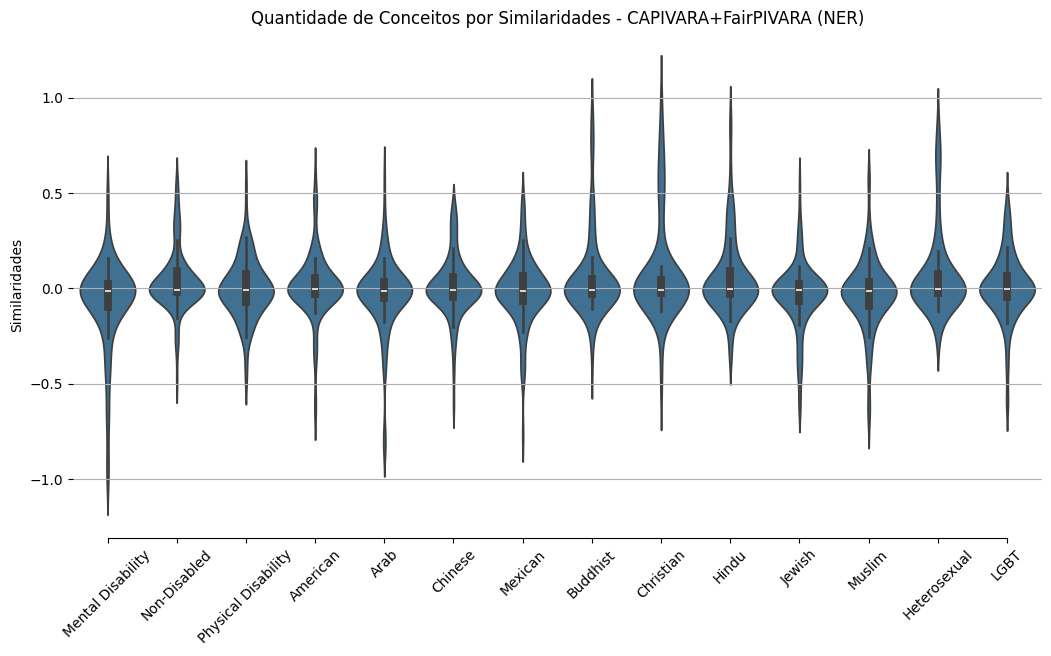

In [72]:
# Set figure size based on Medium's aspect ratio
f, ax = plt.subplots(figsize=(12.5, 6.563))
palette = sns.color_palette(['#3274a1'], len(df['Micro Concept'].unique()))
# Plot boxplot with specific width
g = sns.violinplot(data=df[['Global Concept','Micro Concept','ScoreNorm']], x='Micro Concept',hue='Micro Concept', y='ScoreNorm',palette=palette)
plt.xticks(rotation=45)

# Add gridlines
g.yaxis.grid(True)

# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Quantidade de Conceitos por Similaridades - CAPIVARA+FairPIVARA (NER)")

# Remove border box
sns.despine(trim=True, left=True);

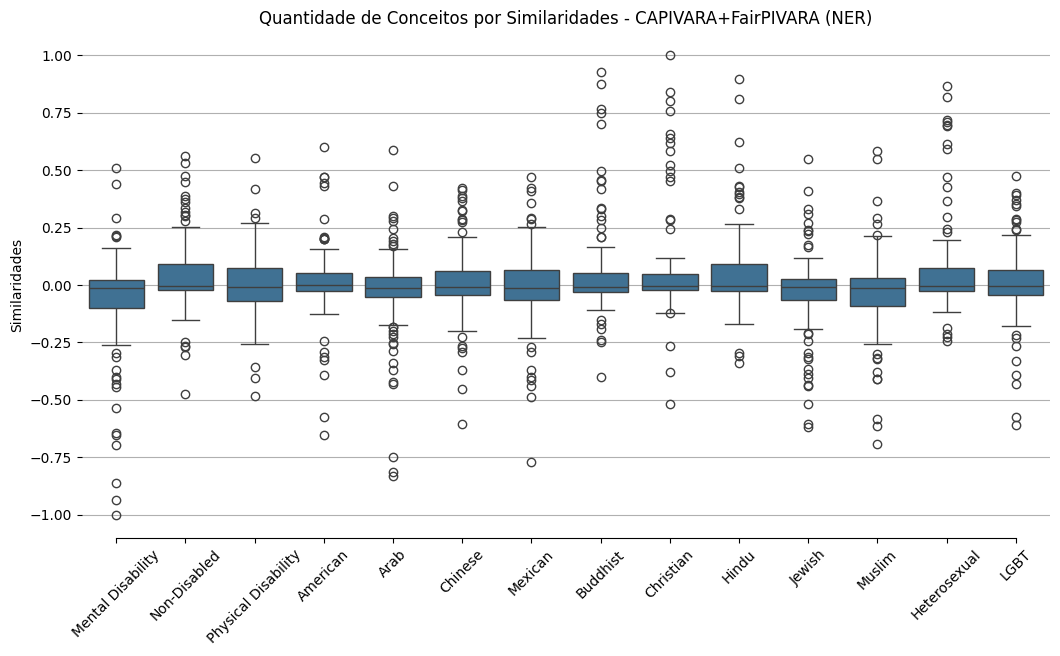

In [73]:
# Set figure size based on Medium's aspect ratio
f, ax = plt.subplots(figsize=(12.5, 6.563))
palette = sns.color_palette(['#3274a1'], len(df['Micro Concept'].unique()))
# Plot boxplot with specific width
g = sns.boxplot(data=df[['Global Concept','Micro Concept','ScoreNorm']], x='Micro Concept',hue='Micro Concept', y='ScoreNorm',palette=palette)
plt.xticks(rotation=45)

# Add gridlines
g.yaxis.grid(True)

# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Quantidade de Conceitos por Similaridades - CAPIVARA+FairPIVARA (NER)")

# Remove border box
sns.despine(trim=True, left=True);

### Resultados apenas para Mental Disability

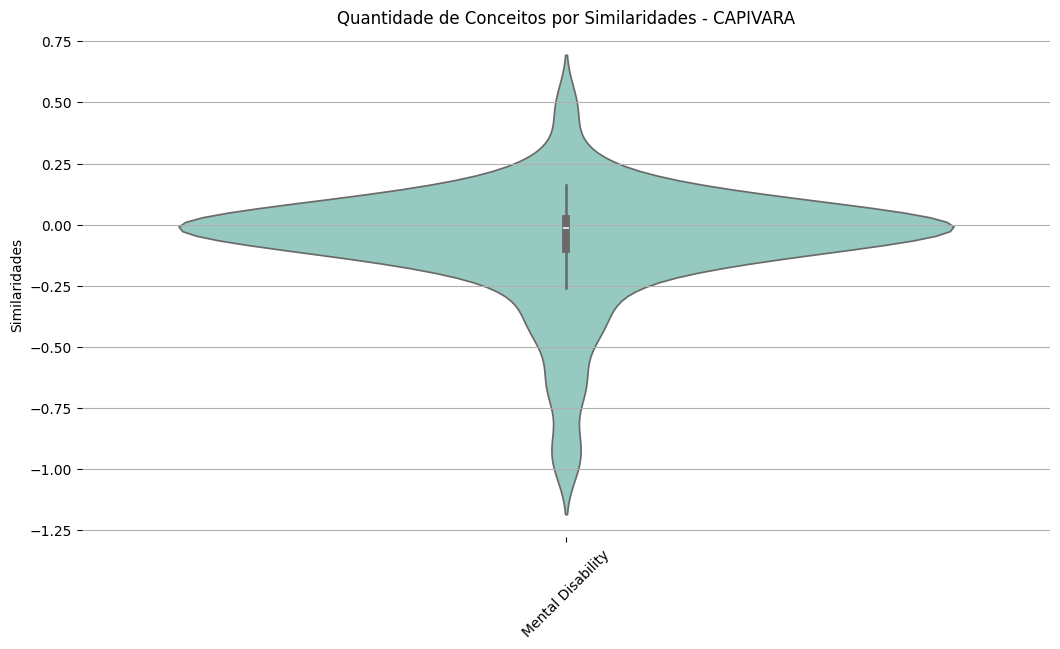

In [8]:
# Set figure size based on Medium's aspect ratio
f, ax = plt.subplots(figsize=(12.5, 6.563))

# Plot boxplot with specific width
g = sns.violinplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']], x='Micro Concept', y='ScoreNorm',hue='Micro Concept',palette="Set3")

plt.xticks(rotation=45)

# Add gridlines
g.yaxis.grid(True)

# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Quantidade de Conceitos por Similaridades - CAPIVARA")

# Remove border box
sns.despine(trim=True, left=True);

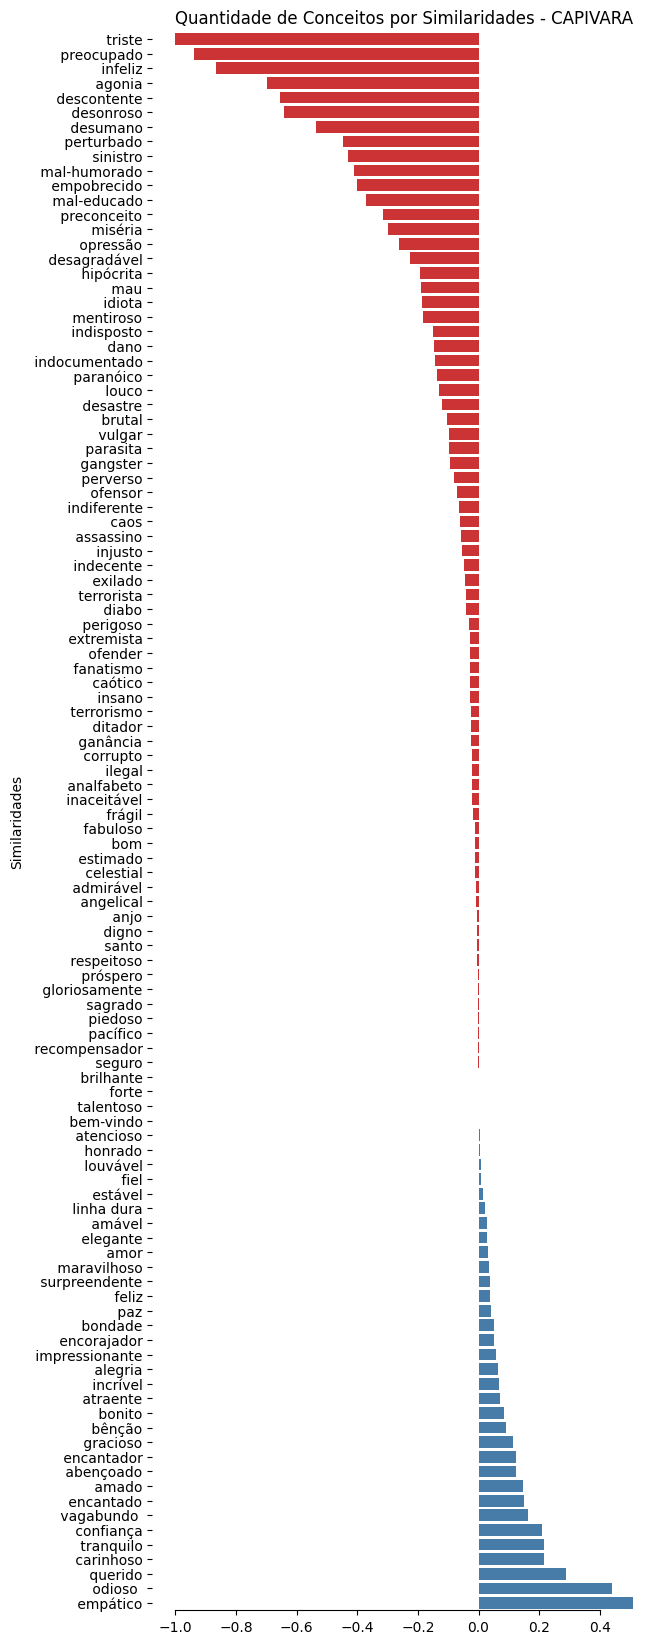

In [8]:
f, ax = plt.subplots(figsize=(6.5, 20.5))
colors = [1 if c[0] >= 0 else 0 for c in df[df['Micro Concept']=='Mental Disability'][['ScoreNorm']].values.tolist()]
g = sns.barplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']], x='ScoreNorm', y='Concept',hue=colors,palette="Set1")
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Quantidade de Conceitos por Similaridades - CAPIVARA")
ax.legend([],[], frameon=False)
# Remove border box
sns.despine(trim=True, left=True);

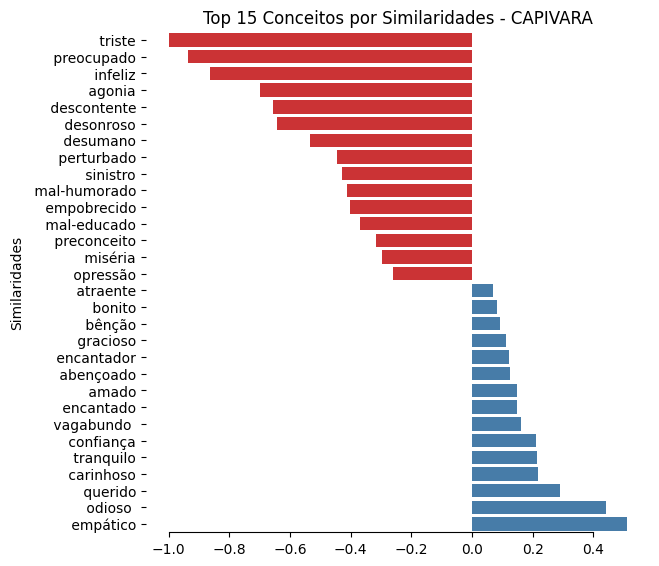

In [9]:
colors = [1 if c[0] >= 0 else 0 for c in df[df['Micro Concept']=='Mental Disability'][['ScoreNorm']].values.tolist()][:15]+[1 if c[0] >= 0 else 0 for c in df[df['Micro Concept']=='Mental Disability'][['ScoreNorm']].values.tolist()][-15:]

f, ax = plt.subplots(figsize=(6.5, 6.5))
g = sns.barplot(data=pd.concat([df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']][:15],df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']][-15:]]), x='ScoreNorm', y='Concept',hue=colors,palette="Set1")
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Top 15 Conceitos por Similaridades - CAPIVARA")
ax.legend([],[], frameon=False)

# Remove border box
sns.despine(trim=True, left=True);

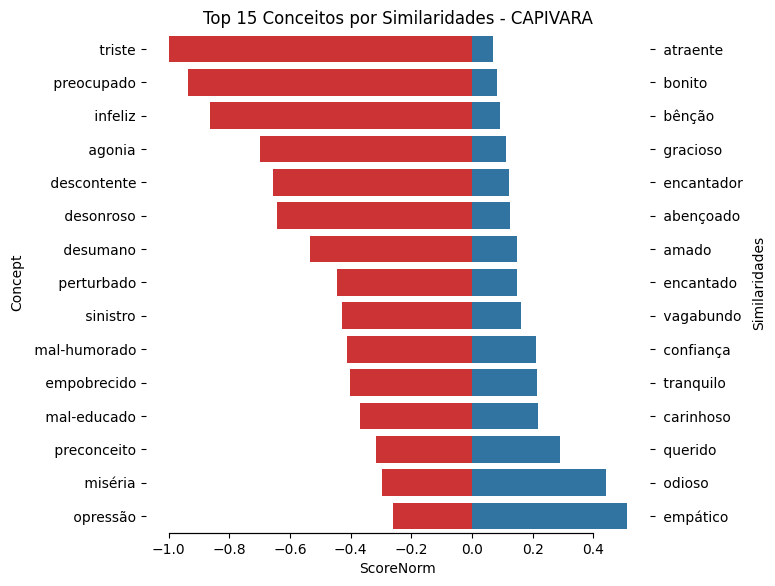

In [10]:
colors_n = [1 if c[0] >= 0 else 0 for c in df[df['Micro Concept']=='Mental Disability'][['ScoreNorm']].values.tolist()][:15]
colors_p = [1 if c[0] >= 0 else 0 for c in df[df['Micro Concept']=='Mental Disability'][['ScoreNorm']].values.tolist()][-15:]

fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.barplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']][:15], x='ScoreNorm', y='Concept',hue=colors_n,palette="Set1")
ax2 = ax.twinx()
g = sns.barplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']][-15:], x='ScoreNorm', y='Concept',hue=colors_p)
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Top 15 Conceitos por Similaridades - CAPIVARA")
ax.legend([],[], frameon=False)
ax2.legend([],[], frameon=False)

# Remove border box
sns.despine(trim=True, left=True);

### Resultados para todas as classes

In [11]:
group_df = df.groupby('Concept').mean().reset_index()
group_df = group_df.sort_values(by=['ScoreNorm'])
group_df

/tmp/ipykernel_888865/147545894.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_df = df.groupby('Concept').mean().reset_index()


Concept       Quant      Score  Score/Quant  ScoreNorm
51        fanatismo  -93.642857 -12.876894    -0.136638  -0.314037
75    indocumentado  -81.714286 -11.859785    -0.142089  -0.290361
89          ofender  -88.285714 -11.086375    -0.128423  -0.272358
49       extremista  -71.000000 -10.196631    -0.142064  -0.251647
113      terrorismo  -65.071429  -9.226518    -0.139191  -0.229065
..              ...         ...        ...          ...        ...
63          honrado   97.214286  12.283184     0.129012   0.271628
107         sagrado   84.928571  12.784489     0.146542   0.283297
0         abençoado  104.071429  13.676614     0.133789   0.304064
95              paz  115.000000  15.789106     0.136566   0.353237
20           bênção  118.428571  16.842108     0.138007   0.377748

[120 rows x 5 columns]

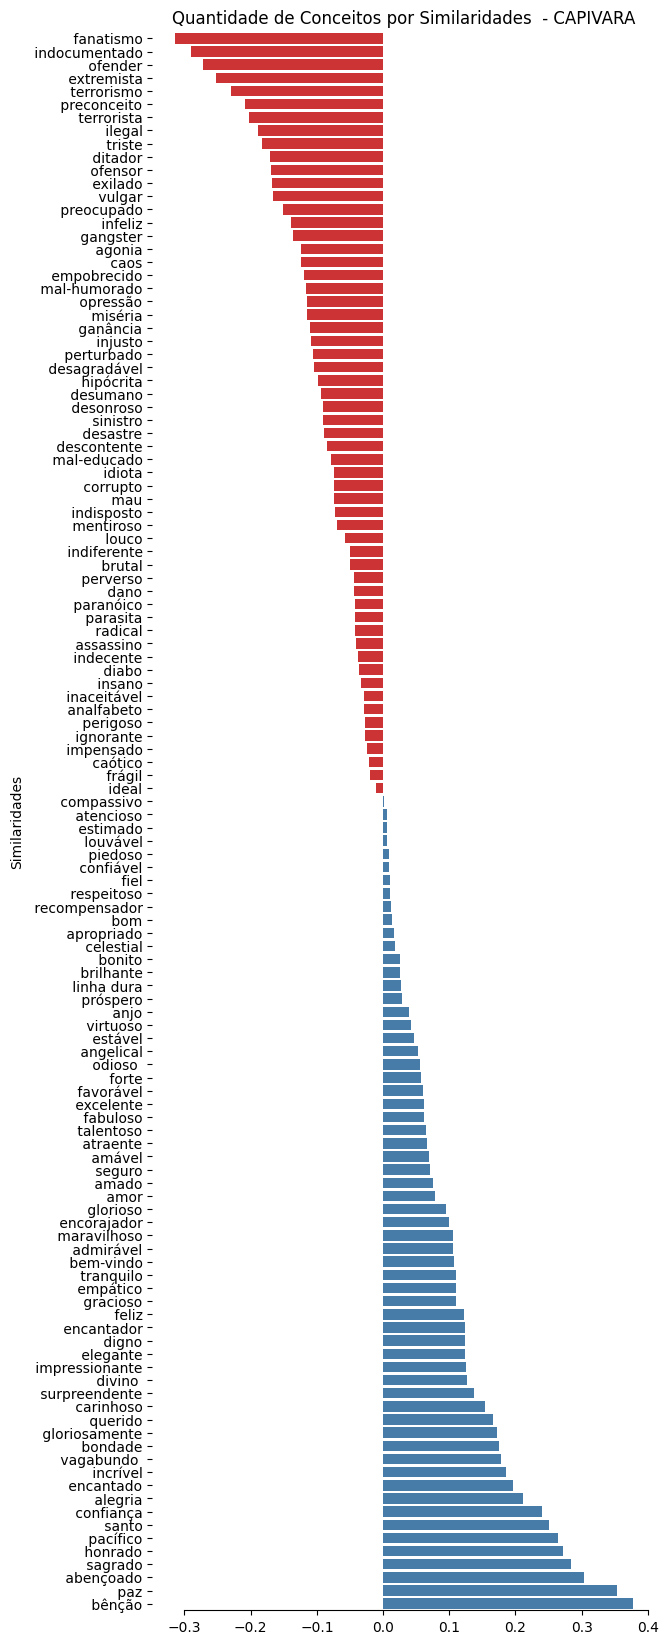

In [12]:
colors = [1 if c >= 0 else 0 for c in group_df['ScoreNorm'].values.tolist()]
f, ax = plt.subplots(figsize=(6.5, 20.5))
g = sns.barplot(data=group_df, x='ScoreNorm', y='Concept',hue=colors,palette="Set1")
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Quantidade de Conceitos por Similaridades  - CAPIVARA")
ax.legend([],[], frameon=False)
# Remove border box
sns.despine(trim=True, left=True);

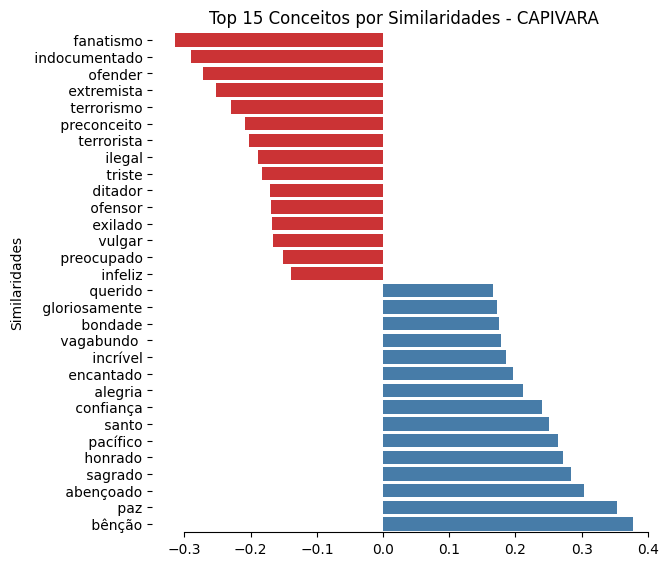

In [13]:
colors_n = [1 if c >= 0 else 0 for c in group_df['ScoreNorm'].values.tolist()][:15]
colors_p = [1 if c >= 0 else 0 for c in group_df['ScoreNorm'].values.tolist()][-15:]

f, ax = plt.subplots(figsize=(6.5, 6.5))
g = sns.barplot(data=pd.concat([group_df[:15],group_df[-15:]]), x='ScoreNorm', y='Concept',hue=colors_n+colors_p,palette="Set1")
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Top 15 Conceitos por Similaridades - CAPIVARA")
ax.legend([],[], frameon=False)

# Remove border box
sns.despine(trim=True, left=True);


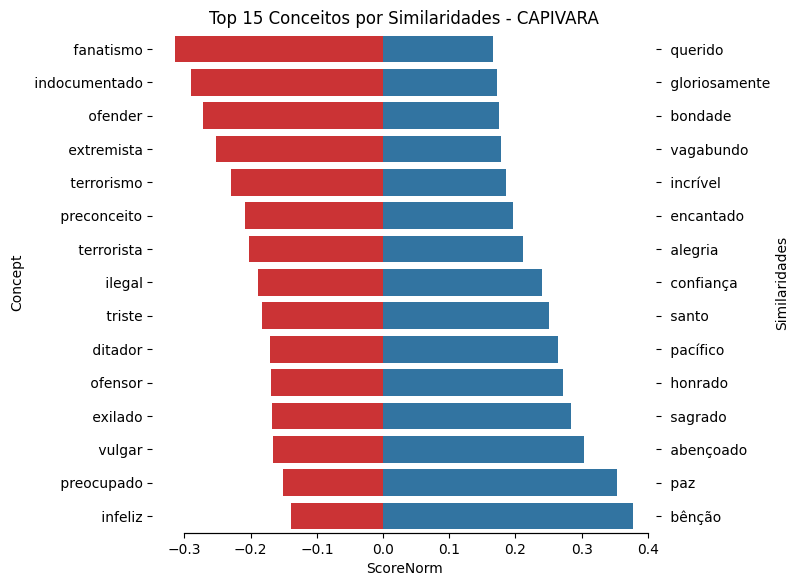

In [14]:
colors = [1 if c >= 0 else 0 for c in group_df['ScoreNorm'].values.tolist()]
colors = [1 if c >= 0 else 0 for c in group_df['ScoreNorm'].values.tolist()]

fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.barplot(data=group_df[:15], x='ScoreNorm', y='Concept',hue=colors_n,palette="Set1")
ax2 = ax.twinx()
g = sns.barplot(data=group_df[-15:], x='ScoreNorm', y='Concept',hue=colors_p)
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Top 15 Conceitos por Similaridades - CAPIVARA")
ax.legend([],[], frameon=False)
ax2.legend([],[], frameon=False)

# Remove border box
sns.despine(trim=True, left=True);

# Removing the same dimensions to X and Y

In [74]:
user = os.environ.get('USER', os.environ.get('USERNAME'))
task='classification'
score_or_quant='both'
extract_top_similar='15'
view_top_similar=''
language='pt-br' # '' for english, 'pt-br' for portuguese
remove_dimensions_list='pt-br-results_theta_same_values.txt'
repetitions='1'
bias_type='same_as_X'

if remove_dimensions_list!='':
    removed_dimensions = remove_dimensions_list.split('/')[-1]

csv_file = f'/home/{user}/FairPIVARA/results/violin/Enviroment:language-{language},task-{task},score_or_quant-{score_or_quant},extract_top_similar-{extract_top_similar},view_top_similar-{view_top_similar},remove_dimensions_list-{remove_dimensions_list},repetitions-{repetitions},bias_type-{bias_type}'

In [75]:
df = pd.read_csv(csv_file)
df['ScoreNorm'] = 2*((df['Score']-min(df['Score']))/(max(df['Score'])-min(df['Score'])))-1
df['Concept'] = df['Concept'].str.replace('humano','')

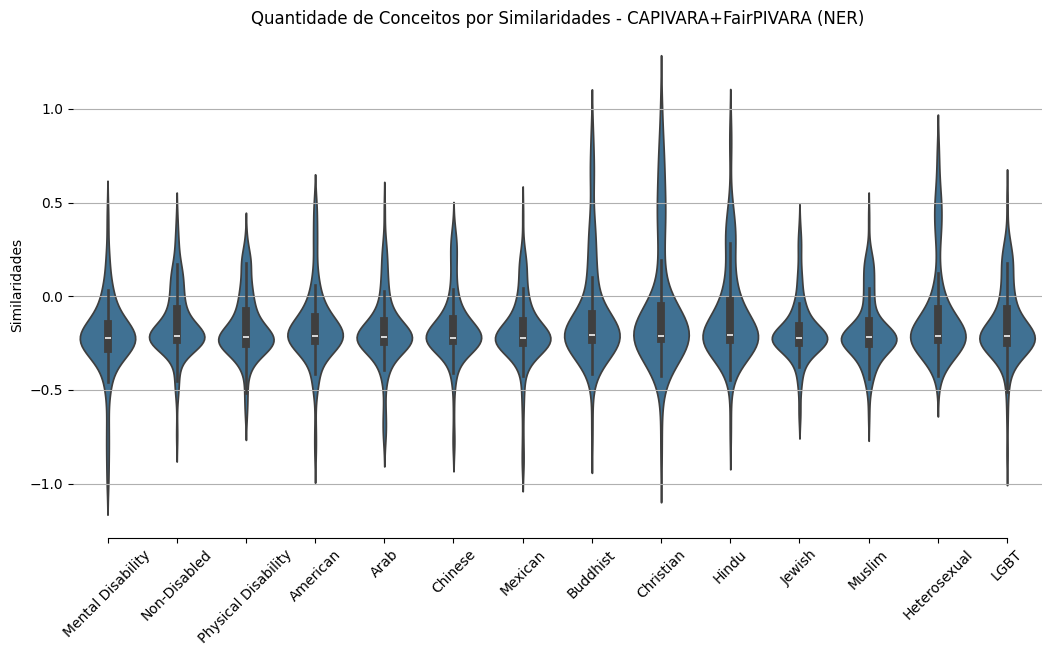

In [77]:
# Set figure size based on Medium's aspect ratio
f, ax = plt.subplots(figsize=(12.5, 6.563))
palette = sns.color_palette(['#3274a1'], len(df['Micro Concept'].unique()))
# Plot boxplot with specific width
g = sns.violinplot(data=df[['Global Concept','Micro Concept','ScoreNorm']], x='Micro Concept',hue='Micro Concept', y='ScoreNorm',palette=palette)
plt.xticks(rotation=45)

# Add gridlines
g.yaxis.grid(True)

# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Quantidade de Conceitos por Similaridades - CAPIVARA+FairPIVARA (NER)")

# Remove border box
sns.despine(trim=True, left=True);

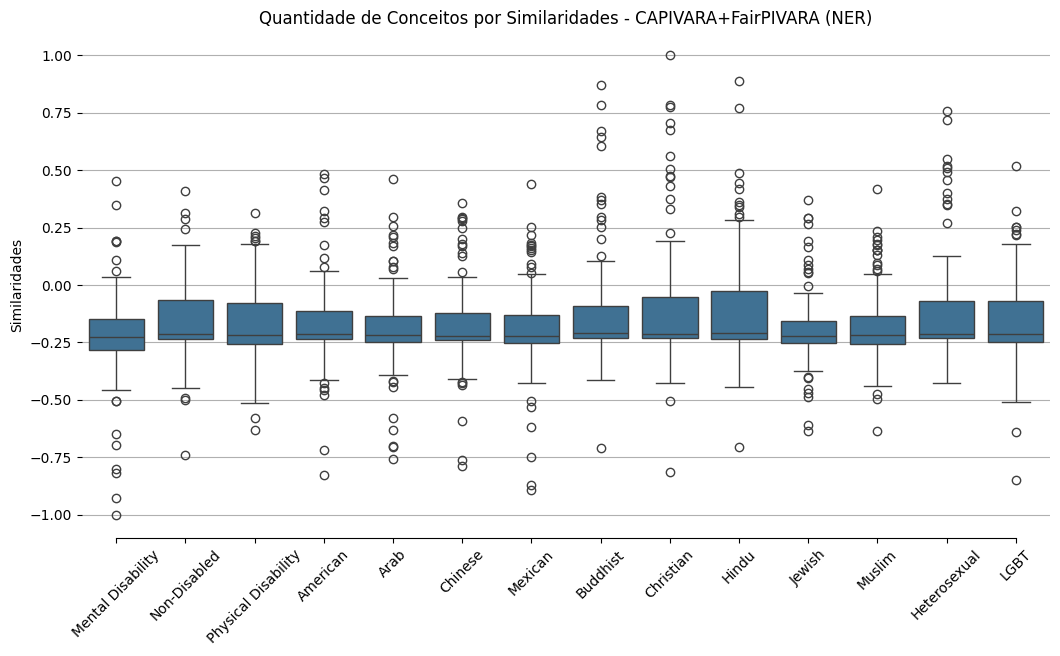

In [78]:
# Set figure size based on Medium's aspect ratio
f, ax = plt.subplots(figsize=(12.5, 6.563))
palette = sns.color_palette(['#3274a1'], len(df['Micro Concept'].unique()))
# Plot boxplot with specific width
g = sns.boxplot(data=df[['Global Concept','Micro Concept','ScoreNorm']], x='Micro Concept',hue='Micro Concept', y='ScoreNorm',palette=palette)
plt.xticks(rotation=45)

# Add gridlines
g.yaxis.grid(True)

# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Quantidade de Conceitos por Similaridades - CAPIVARA+FairPIVARA (NER)")

# Remove border box
sns.despine(trim=True, left=True);

### Resultados para todas as classes

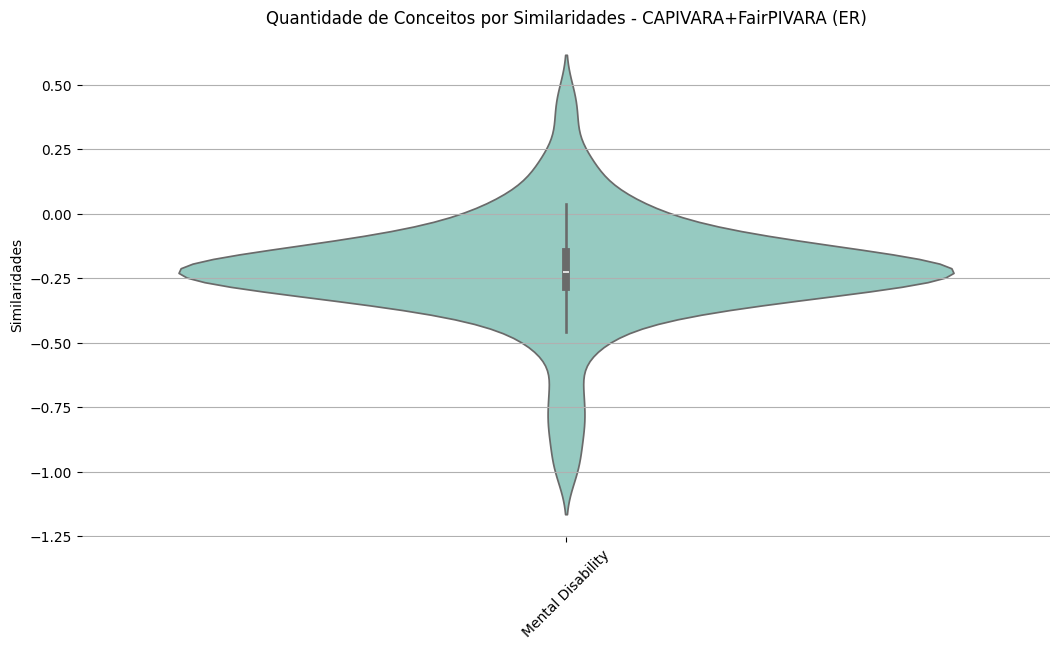

In [18]:
# Set figure size based on Medium's aspect ratio
f, ax = plt.subplots(figsize=(12.5, 6.563))

# Plot boxplot with specific width
g = sns.violinplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']], x='Micro Concept', y='ScoreNorm',hue='Micro Concept',palette="Set3")
plt.xticks(rotation=45)

# Add gridlines
g.yaxis.grid(True)

# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Quantidade de Conceitos por Similaridades - CAPIVARA+FairPIVARA (ER)")

# Remove border box
sns.despine(trim=True, left=True);

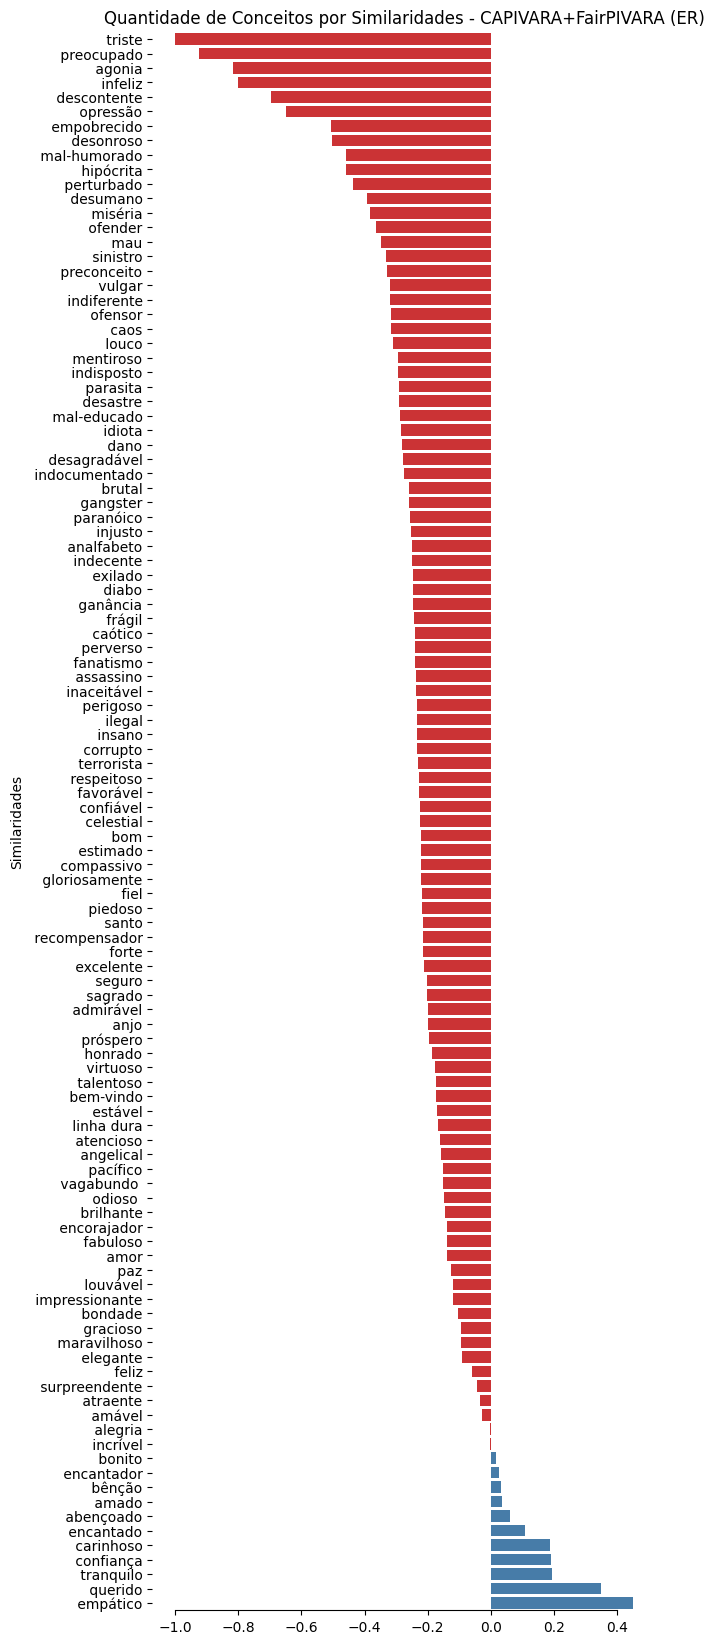

In [19]:
f, ax = plt.subplots(figsize=(6.5, 20.5))
colors = [1 if c[0] >= 0 else 0 for c in df[df['Micro Concept']=='Mental Disability'][['ScoreNorm']].values.tolist()]
g = sns.barplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']], x='ScoreNorm', y='Concept',hue=colors,palette="Set1")
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Quantidade de Conceitos por Similaridades - CAPIVARA+FairPIVARA (ER)")
ax.legend([],[], frameon=False)
# Remove border box
sns.despine(trim=True, left=True);

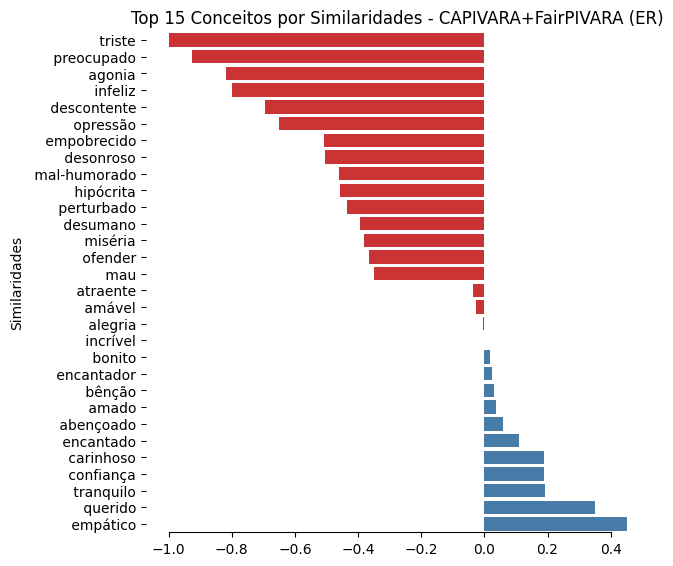

In [20]:
colors = [1 if c[0] >= 0 else 0 for c in df[df['Micro Concept']=='Mental Disability'][['ScoreNorm']].values.tolist()][:15]+[1 if c[0] >= 0 else 0 for c in df[df['Micro Concept']=='Mental Disability'][['ScoreNorm']].values.tolist()][-15:]

f, ax = plt.subplots(figsize=(6.5, 6.5))
g = sns.barplot(data=pd.concat([df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']][:15],df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']][-15:]]), x='ScoreNorm', y='Concept',hue=colors,palette="Set1")
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Top 15 Conceitos por Similaridades - CAPIVARA+FairPIVARA (ER)")
ax.legend([],[], frameon=False)

# Remove border box
sns.despine(trim=True, left=True);

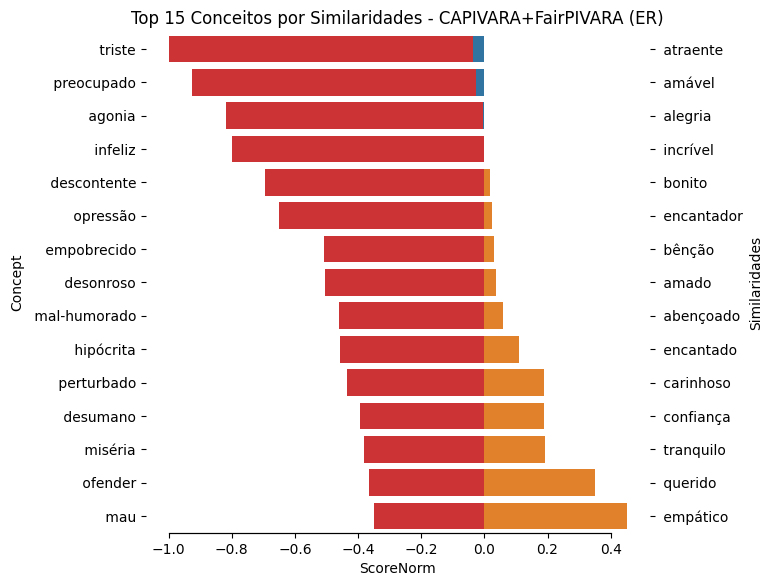

In [21]:
colors_n = [1 if c[0] >= 0 else 0 for c in df[df['Micro Concept']=='Mental Disability'][['ScoreNorm']].values.tolist()][:15]
colors_p = [1 if c[0] >= 0 else 0 for c in df[df['Micro Concept']=='Mental Disability'][['ScoreNorm']].values.tolist()][-15:]

fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.barplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']][:15], x='ScoreNorm', y='Concept',hue=colors_n,palette="Set1")
ax2 = ax.twinx()
g = sns.barplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']][-15:], x='ScoreNorm', y='Concept',hue=colors_p)
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Top 15 Conceitos por Similaridades - CAPIVARA+FairPIVARA (ER)")
ax.legend([],[], frameon=False)
ax2.legend([],[], frameon=False)

# Remove border box
sns.despine(trim=True, left=True);

### Resultados para todas as classes


In [22]:
group_df = df.groupby('Concept').mean().reset_index()
group_df = group_df.sort_values(by=['ScoreNorm'])
group_df

/tmp/ipykernel_888865/147545894.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_df = df.groupby('Concept').mean().reset_index()


Concept       Quant      Score  ScoreNorm
89          ofender -116.500000 -11.683705  -0.615757
51        fanatismo  -73.642857  -7.647994  -0.482214
90          ofensor  -50.000000  -4.970621  -0.393620
75    indocumentado  -48.285714  -4.899860  -0.391278
119          vulgar  -45.642857  -4.758111  -0.386588
..              ...         ...        ...        ...
0         abençoado  121.714286  12.448613   0.182785
3           alegria  116.428571  12.503079   0.184587
95              paz  122.785714  12.974177   0.200176
92         pacífico  130.142857  13.529227   0.218543
20           bênção  131.857143  14.561201   0.252691

[120 rows x 4 columns]

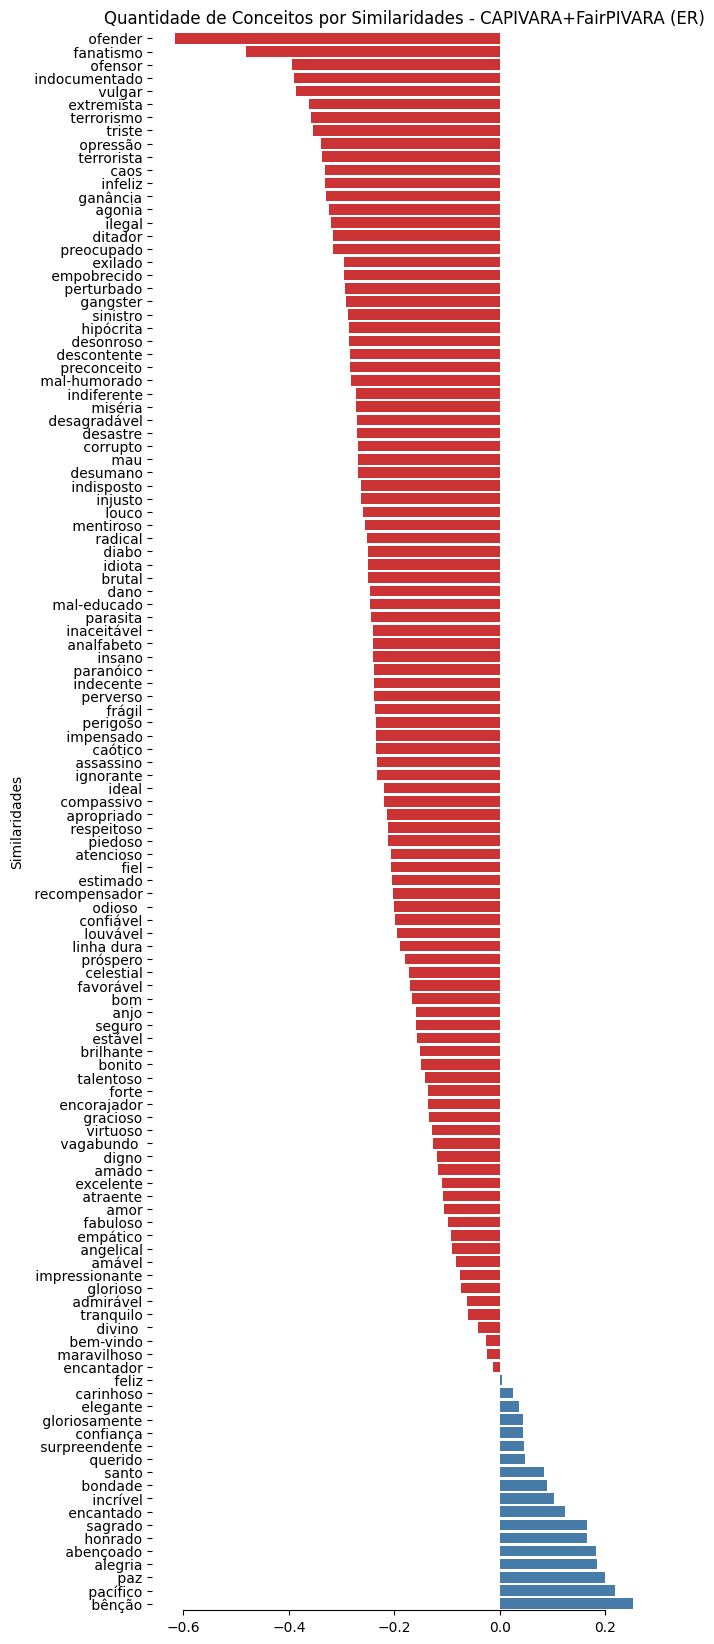

In [23]:
colors = [1 if c >= 0 else 0 for c in group_df['ScoreNorm'].values.tolist()]
f, ax = plt.subplots(figsize=(6.5, 20.5))
g = sns.barplot(data=group_df, x='ScoreNorm', y='Concept',hue=colors,palette="Set1")
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Quantidade de Conceitos por Similaridades - CAPIVARA+FairPIVARA (ER)")
ax.legend([],[], frameon=False)
# Remove border box
sns.despine(trim=True, left=True);

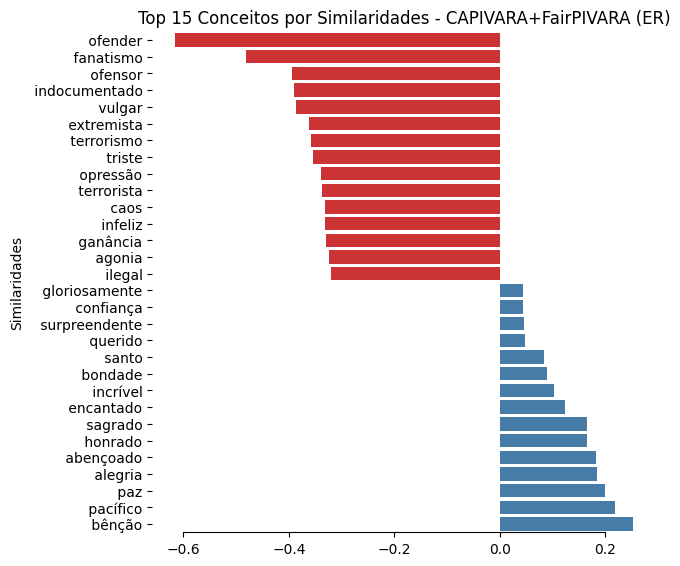

In [24]:
colors_n = [1 if c >= 0 else 0 for c in group_df['ScoreNorm'].values.tolist()][:15]
colors_p = [1 if c >= 0 else 0 for c in group_df['ScoreNorm'].values.tolist()][-15:]

f, ax = plt.subplots(figsize=(6.5, 6.5))
g = sns.barplot(data=pd.concat([group_df[:15],group_df[-15:]]), x='ScoreNorm', y='Concept',hue=colors_n+colors_p,palette="Set1")
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Top 15 Conceitos por Similaridades - CAPIVARA+FairPIVARA (ER)")
ax.legend([],[], frameon=False)

# Remove border box
sns.despine(trim=True, left=True);

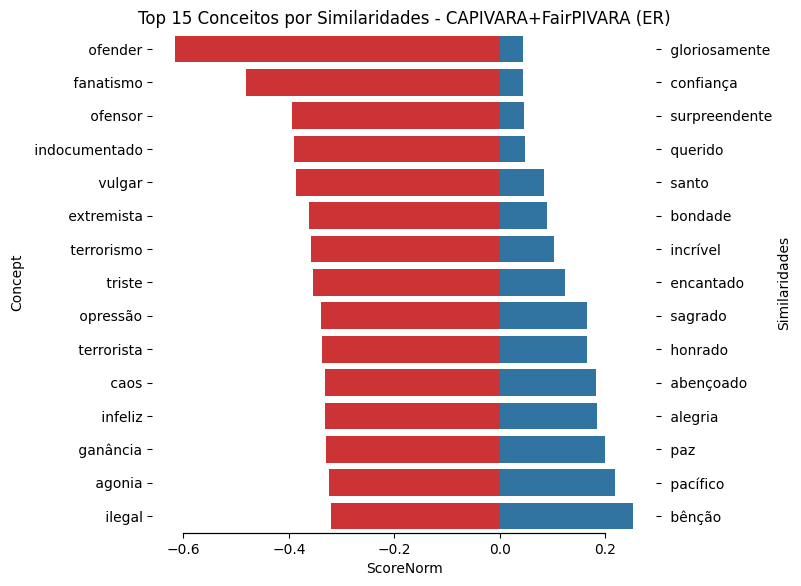

In [25]:
colors = [1 if c >= 0 else 0 for c in group_df['ScoreNorm'].values.tolist()]
colors = [1 if c >= 0 else 0 for c in group_df['ScoreNorm'].values.tolist()]

fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.barplot(data=group_df[:15], x='ScoreNorm', y='Concept',hue=colors_n,palette="Set1")
ax2 = ax.twinx()
g = sns.barplot(data=group_df[-15:], x='ScoreNorm', y='Concept',hue=colors_p)
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Top 15 Conceitos por Similaridades - CAPIVARA+FairPIVARA (ER)")
ax.legend([],[], frameon=False)
ax2.legend([],[], frameon=False)

# Remove border box
sns.despine(trim=True, left=True);

# Removing the X dimensions, with random Y remove  - 10

In [79]:
user = os.environ.get('USER', os.environ.get('USERNAME'))
task='classification'
score_or_quant='both'
extract_top_similar='15'
view_top_similar=''
remove_dimensions_list='results/pt-theta-001to005/pt-br-results_theta_same_values.txt'
repetitions='10'
bias_type='random_A_B'

if remove_dimensions_list!='':
    removed_dimensions = remove_dimensions_list.split('/')[-1]

csv_file = f'/home/{user}/FairPIVARA/results/violin/Enviroment:language-{language},task-{task},score_or_quant-{score_or_quant},extract_top_similar-{extract_top_similar},view_top_similar-{view_top_similar},remove_dimensions_list-{removed_dimensions},repetitions-{repetitions},bias_type-{bias_type}'

df = pd.read_csv(csv_file)
df[['Quant','Score']]=df[['Quant','Score']].div(10)
df['ScoreNorm'] = 2*((df['Score']-min(df['Score']))/(max(df['Score'])-min(df['Score'])))-1
df['Concept'] = df['Concept'].str.replace('humano','')

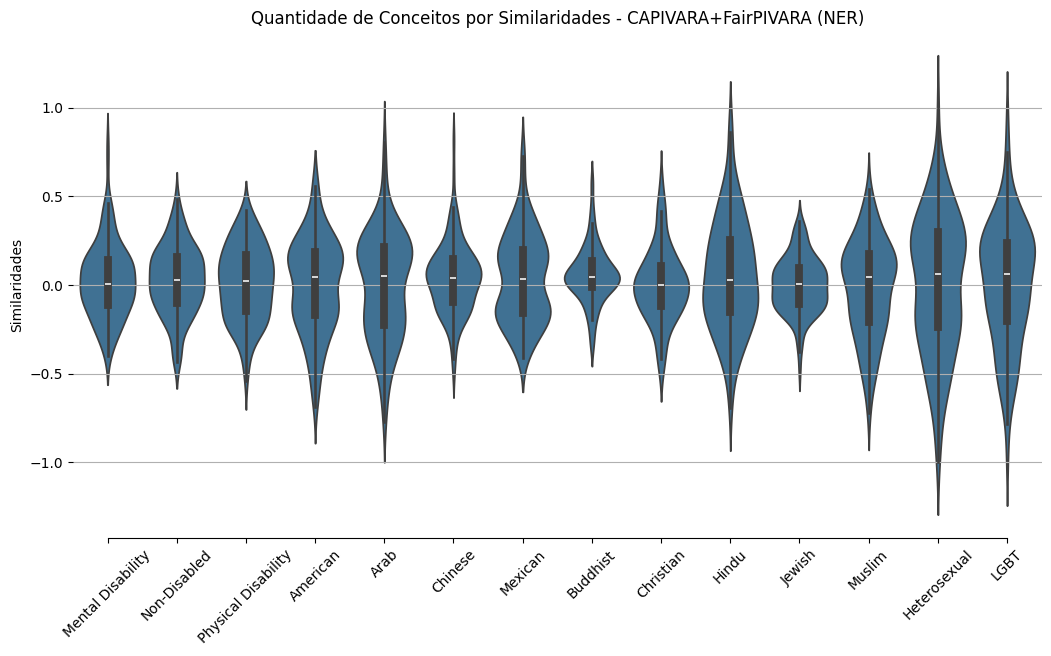

In [81]:
# Set figure size based on Medium's aspect ratio
f, ax = plt.subplots(figsize=(12.5, 6.563))
palette = sns.color_palette(['#3274a1'], len(df['Micro Concept'].unique()))
# Plot boxplot with specific width
g = sns.violinplot(data=df[['Global Concept','Micro Concept','ScoreNorm']], x='Micro Concept',hue='Micro Concept', y='ScoreNorm',palette=palette)
plt.xticks(rotation=45)

# Add gridlines
g.yaxis.grid(True)

# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Quantidade de Conceitos por Similaridades - CAPIVARA+FairPIVARA (NER)")

# Remove border box
sns.despine(trim=True, left=True);

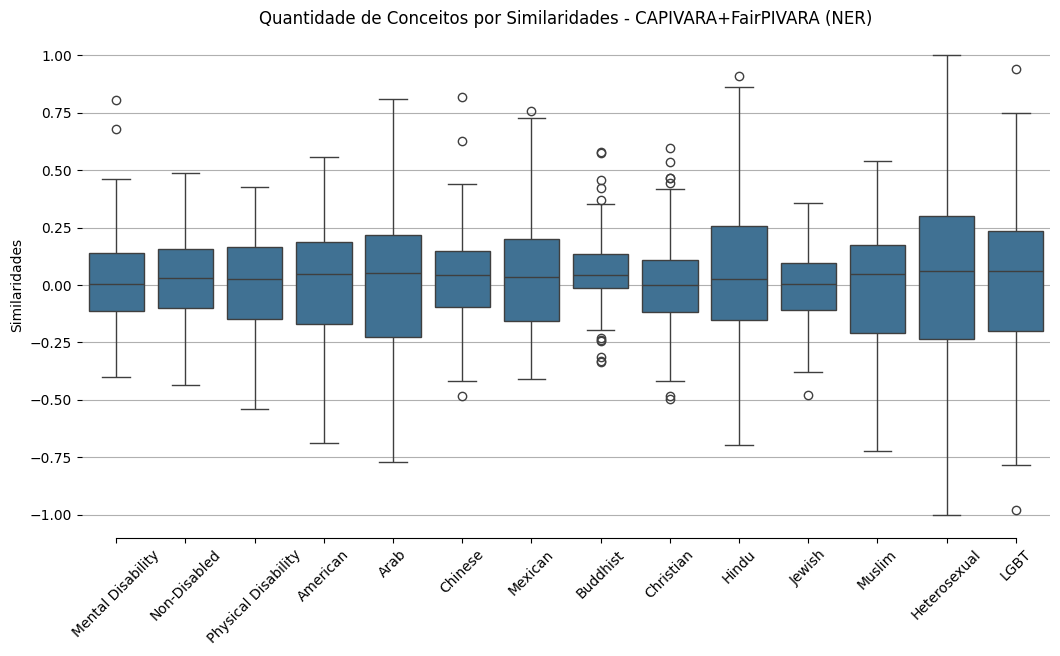

In [82]:
# Set figure size based on Medium's aspect ratio
f, ax = plt.subplots(figsize=(12.5, 6.563))
palette = sns.color_palette(['#3274a1'], len(df['Micro Concept'].unique()))
# Plot boxplot with specific width
g = sns.boxplot(data=df[['Global Concept','Micro Concept','ScoreNorm']], x='Micro Concept',hue='Micro Concept', y='ScoreNorm',palette=palette)
plt.xticks(rotation=45)

# Add gridlines
g.yaxis.grid(True)

# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Quantidade de Conceitos por Similaridades - CAPIVARA+FairPIVARA (NER)")

# Remove border box
sns.despine(trim=True, left=True);

# Removing the X dimensions, with random Y remove  - 100

In [83]:
user = os.environ.get('USER', os.environ.get('USERNAME'))
task='classification'
score_or_quant='both'
extract_top_similar='15'
view_top_similar=''
remove_dimensions_list='results/pt-theta-001to005/pt-br-results_theta_same_values.txt'
repetitions='100'
bias_type='random_A_B'

if remove_dimensions_list!='':
    removed_dimensions = remove_dimensions_list.split('/')[-1]

csv_file = f'/home/{user}/FairPIVARA/results/violin/Enviroment:language-{language},task-{task},score_or_quant-{score_or_quant},extract_top_similar-{extract_top_similar},view_top_similar-{view_top_similar},remove_dimensions_list-{removed_dimensions},repetitions-{repetitions},bias_type-{bias_type}'


In [84]:
df = pd.read_csv(csv_file)
df[['Quant','Score']]=df[['Quant','Score']].div(100)
df['ScoreNorm'] = 2*((df['Score']-min(df['Score']))/(max(df['Score'])-min(df['Score'])))-1
df['Concept'] = df['Concept'].str.replace('humano','')

In [85]:
df['Score/Quant'] = df['Score']/abs(df['Quant'])

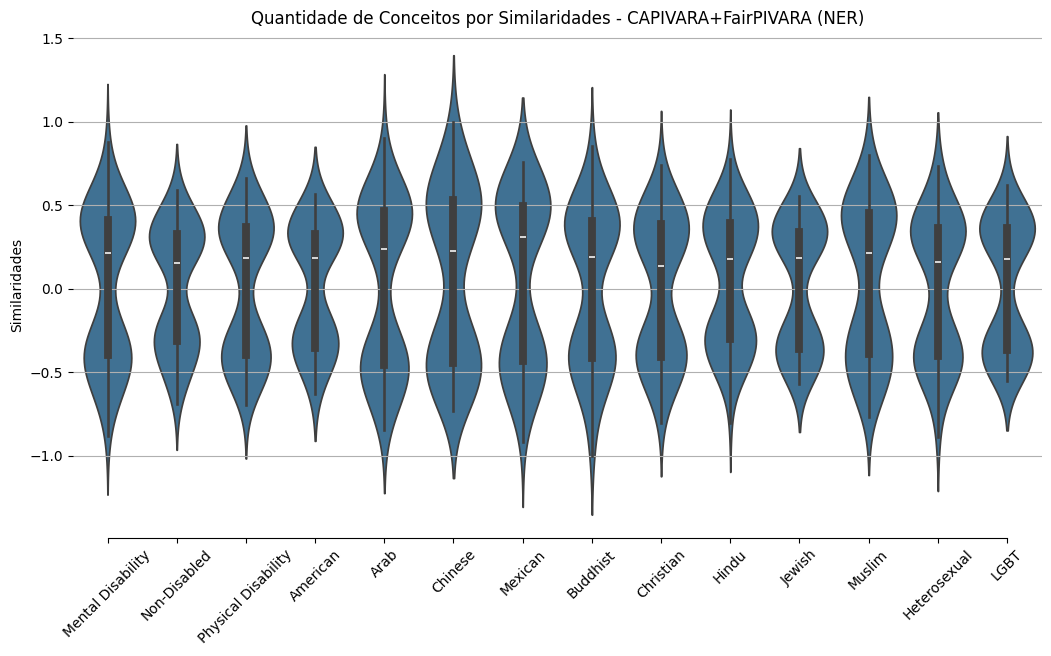

In [86]:
# Set figure size based on Medium's aspect ratio
f, ax = plt.subplots(figsize=(12.5, 6.563))
palette = sns.color_palette(['#3274a1'], len(df['Micro Concept'].unique()))
# Plot boxplot with specific width
g = sns.violinplot(data=df[['Global Concept','Micro Concept','ScoreNorm']], x='Micro Concept',hue='Micro Concept', y='ScoreNorm',palette=palette)
plt.xticks(rotation=45)

# Add gridlines
g.yaxis.grid(True)

# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Quantidade de Conceitos por Similaridades - CAPIVARA+FairPIVARA (NER)")

# Remove border box
sns.despine(trim=True, left=True);

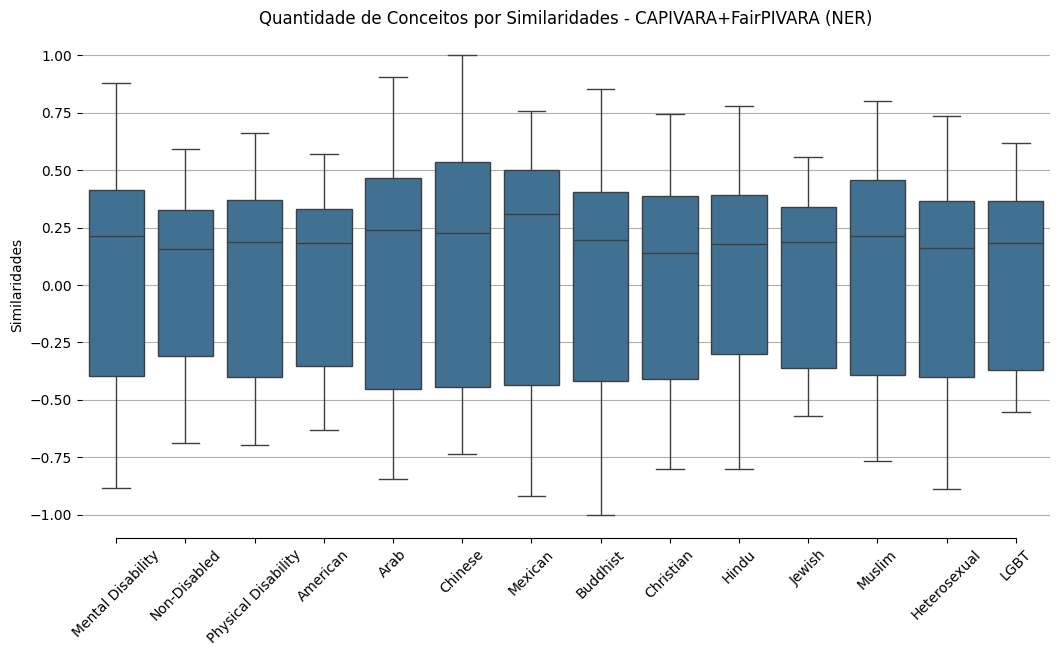

In [87]:
# Set figure size based on Medium's aspect ratio
f, ax = plt.subplots(figsize=(12.5, 6.563))
palette = sns.color_palette(['#3274a1'], len(df['Micro Concept'].unique()))
# Plot boxplot with specific width
g = sns.boxplot(data=df[['Global Concept','Micro Concept','ScoreNorm']], x='Micro Concept',hue='Micro Concept', y='ScoreNorm',palette=palette)
plt.xticks(rotation=45)

# Add gridlines
g.yaxis.grid(True)

# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Quantidade de Conceitos por Similaridades - CAPIVARA+FairPIVARA (NER)")

# Remove border box
sns.despine(trim=True, left=True);

### Resultados apenas para Mental Disability


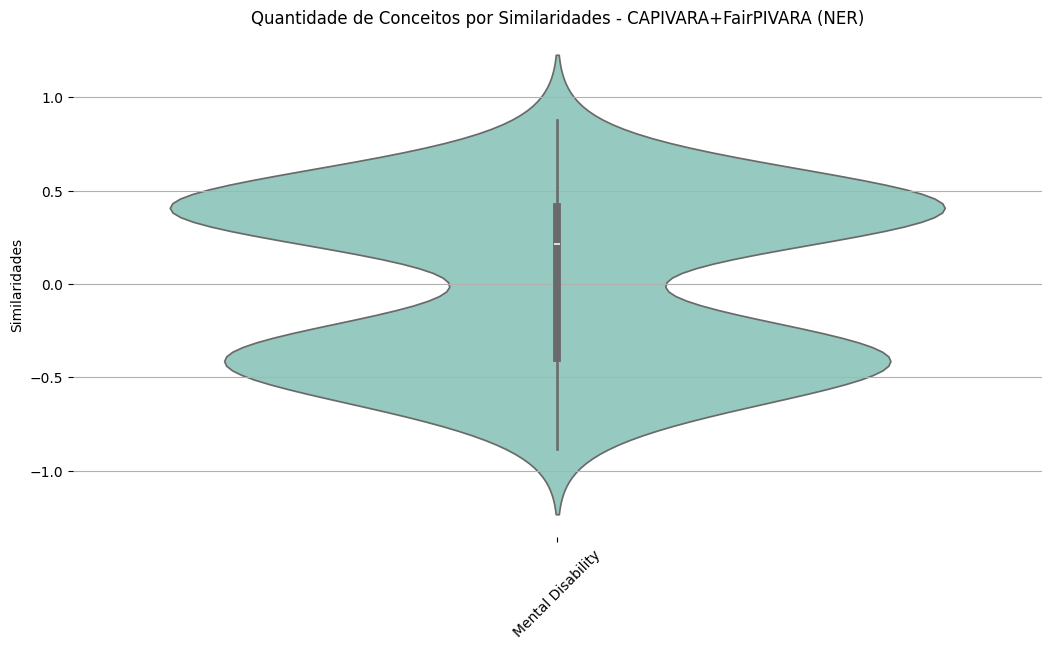

In [32]:
# Set figure size based on Medium's aspect ratio
f, ax = plt.subplots(figsize=(12.5, 6.563))

# Plot boxplot with specific width
g = sns.violinplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']], x='Micro Concept', y='ScoreNorm',hue='Micro Concept',palette="Set3")
plt.xticks(rotation=45)

# Add gridlines
g.yaxis.grid(True)

# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Quantidade de Conceitos por Similaridades - CAPIVARA+FairPIVARA (NER)")

# Remove border box
sns.despine(trim=True, left=True);

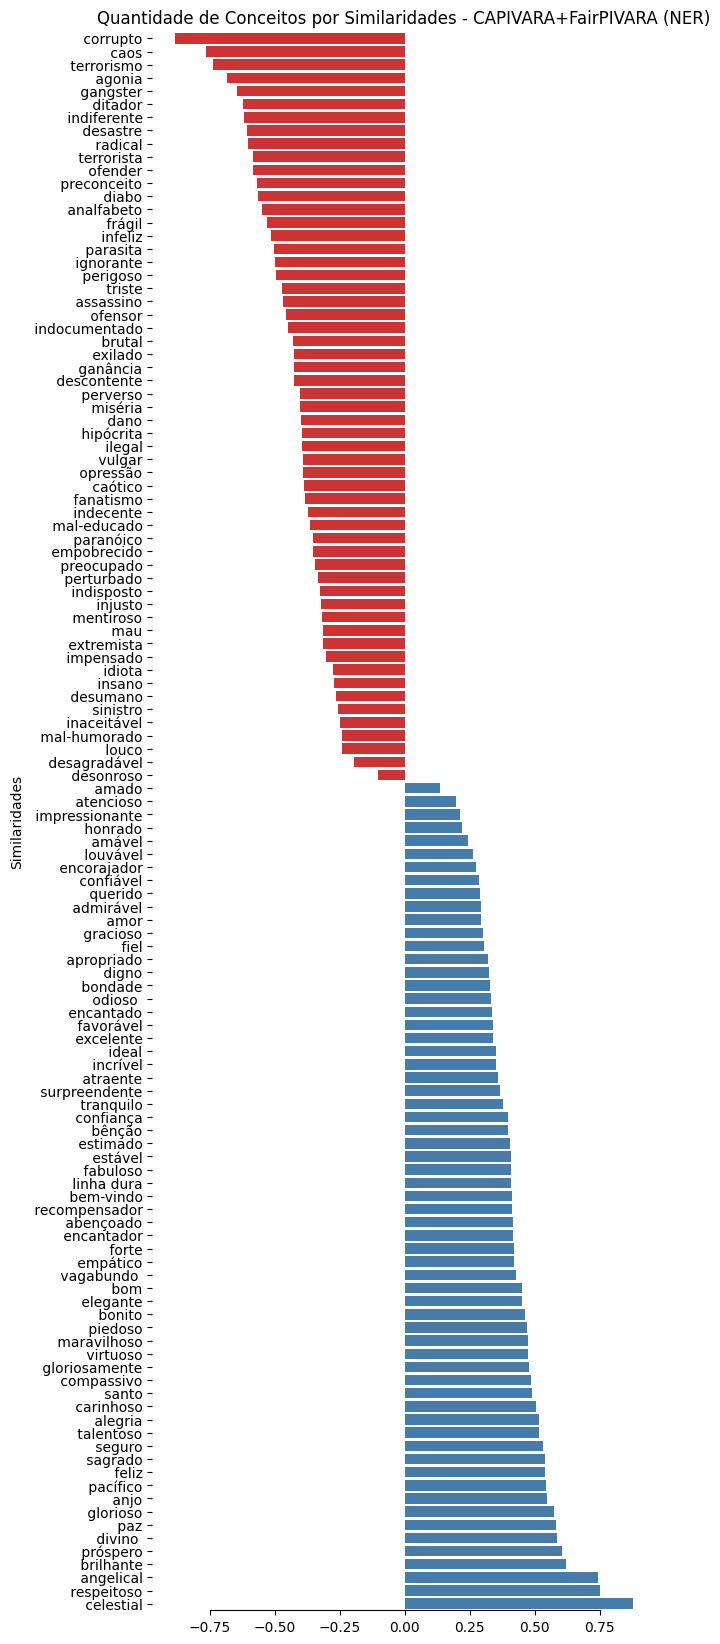

In [33]:
f, ax = plt.subplots(figsize=(6.5, 20.5))
colors = [1 if c[0] >= 0 else 0 for c in df[df['Micro Concept']=='Mental Disability'][['ScoreNorm']].values.tolist()]
g = sns.barplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']], x='ScoreNorm', y='Concept',hue=colors,palette="Set1")
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Quantidade de Conceitos por Similaridades - CAPIVARA+FairPIVARA (NER)")
ax.legend([],[], frameon=False)
# Remove border box
sns.despine(trim=True, left=True);

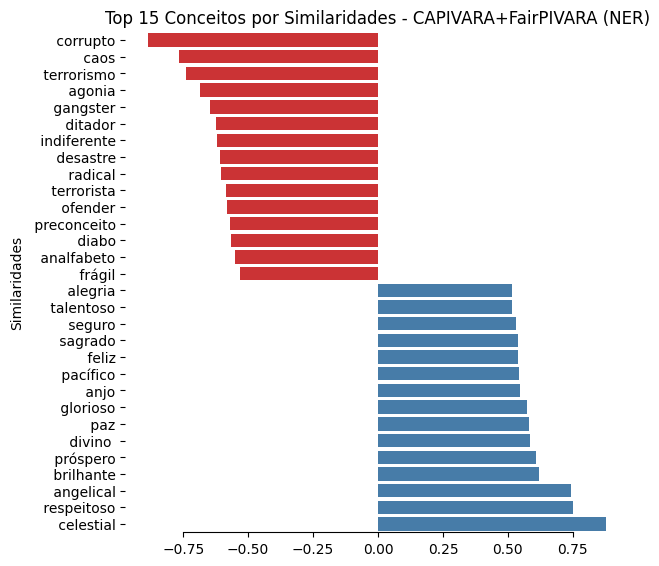

In [34]:
colors = [1 if c[0] >= 0 else 0 for c in df[df['Micro Concept']=='Mental Disability'][['ScoreNorm']].values.tolist()][:15]+[1 if c[0] >= 0 else 0 for c in df[df['Micro Concept']=='Mental Disability'][['ScoreNorm']].values.tolist()][-15:]

f, ax = plt.subplots(figsize=(6.5, 6.5))
g = sns.barplot(data=pd.concat([df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']][:15],df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']][-15:]]), x='ScoreNorm', y='Concept',hue=colors,palette="Set1")
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Top 15 Conceitos por Similaridades - CAPIVARA+FairPIVARA (NER)")
ax.legend([],[], frameon=False)

# Remove border box
sns.despine(trim=True, left=True);

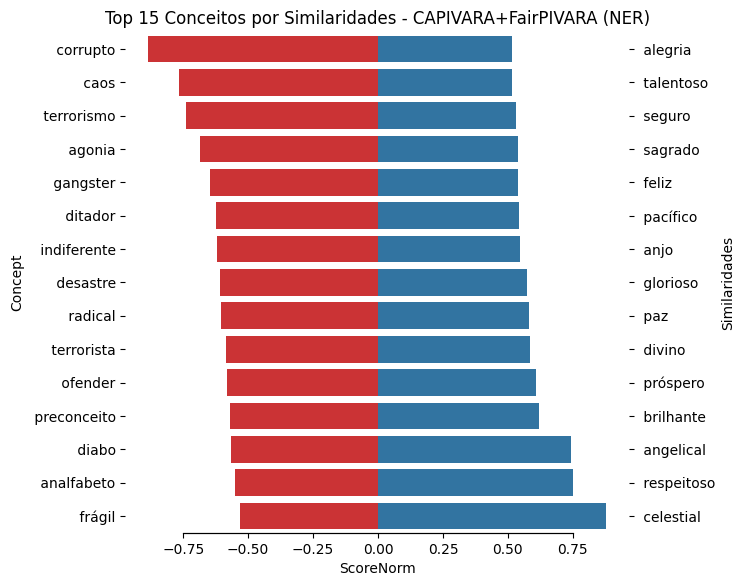

In [35]:
colors_n = [1 if c[0] >= 0 else 0 for c in df[df['Micro Concept']=='Mental Disability'][['ScoreNorm']].values.tolist()][:15]
colors_p = [1 if c[0] >= 0 else 0 for c in df[df['Micro Concept']=='Mental Disability'][['ScoreNorm']].values.tolist()][-15:]

fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.barplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']][:15], x='ScoreNorm', y='Concept',hue=colors_n,palette="Set1")
ax2 = ax.twinx()
g = sns.barplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']][-15:], x='ScoreNorm', y='Concept',hue=colors_p)
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Top 15 Conceitos por Similaridades - CAPIVARA+FairPIVARA (NER)")
ax.legend([],[], frameon=False)
ax2.legend([],[], frameon=False)

# Remove border box
sns.despine(trim=True, left=True);

### Resultados para todas as classes


In [36]:
group_df = df.groupby('Concept').mean().reset_index()
group_df = group_df.sort_values(by=['ScoreNorm'])
group_df


/tmp/ipykernel_888865/1901231878.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_df = df.groupby('Concept').mean().reset_index()


Concept      Quant     Score  ScoreNorm  Score/Quant
113      terrorismo -49.792143 -1.138614  -0.603474    -0.022872
57         gangster -51.350000 -1.127042  -0.597284    -0.021824
75    indocumentado -49.345000 -1.069561  -0.566536    -0.021849
56           frágil -46.395000 -1.068558  -0.566000    -0.023297
116          triste -47.432143 -1.049200  -0.555645    -0.022223
..              ...        ...       ...        ...          ...
3           alegria  46.238571  1.041296   0.562597     0.022564
8         angelical  46.379286  1.055024   0.569940     0.022601
9              anjo  44.673571  1.068748   0.577282     0.023902
24        celestial  45.745000  1.079004   0.582767     0.023458
95              paz  46.948571  1.106736   0.597602     0.023687

[120 rows x 5 columns]

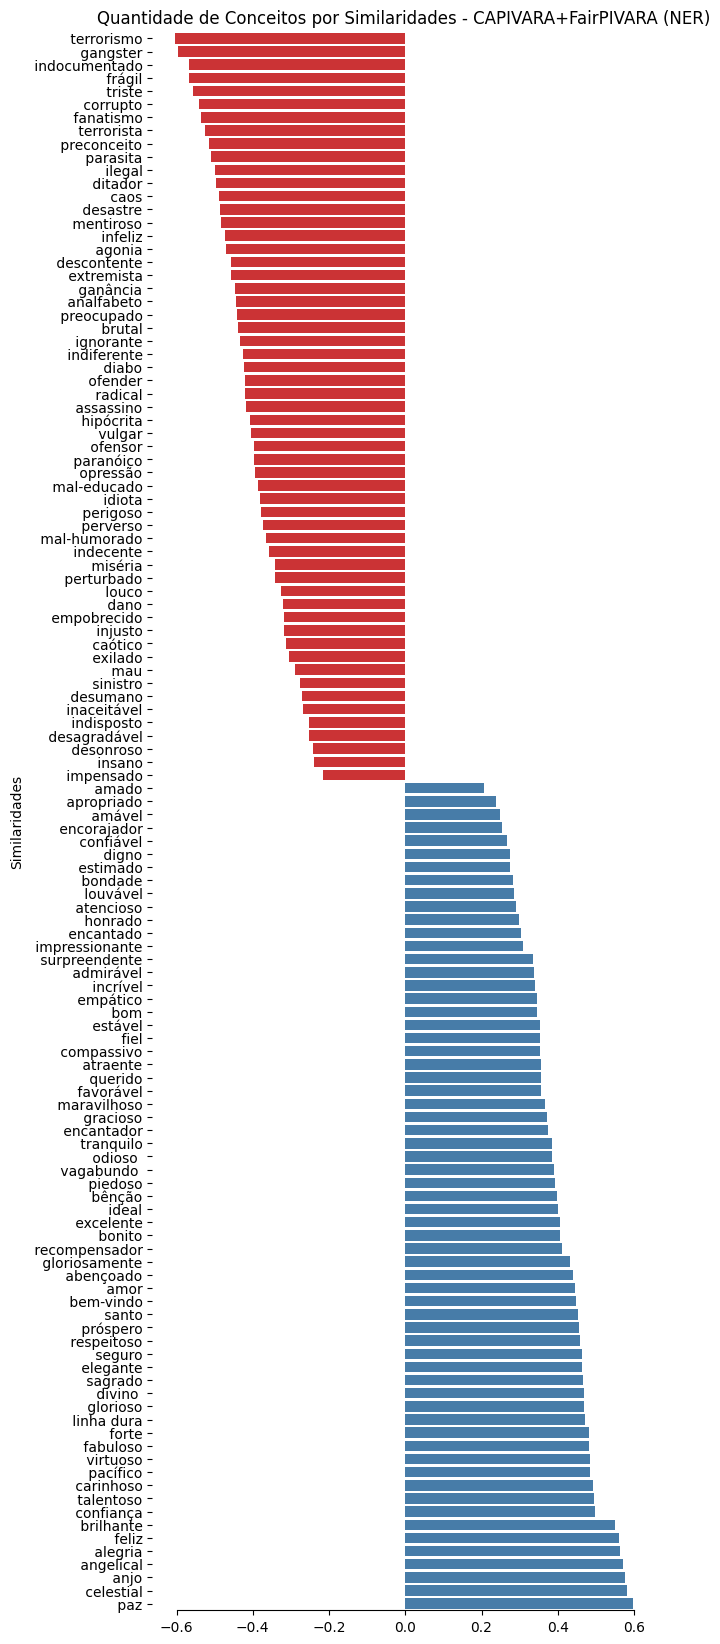

In [37]:
colors = [1 if c >= 0 else 0 for c in group_df['ScoreNorm'].values.tolist()]
f, ax = plt.subplots(figsize=(6.5, 20.5))
g = sns.barplot(data=group_df, x='ScoreNorm', y='Concept',hue=colors,palette="Set1")
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Quantidade de Conceitos por Similaridades - CAPIVARA+FairPIVARA (NER)")
ax.legend([],[], frameon=False)
# Remove border box
sns.despine(trim=True, left=True);

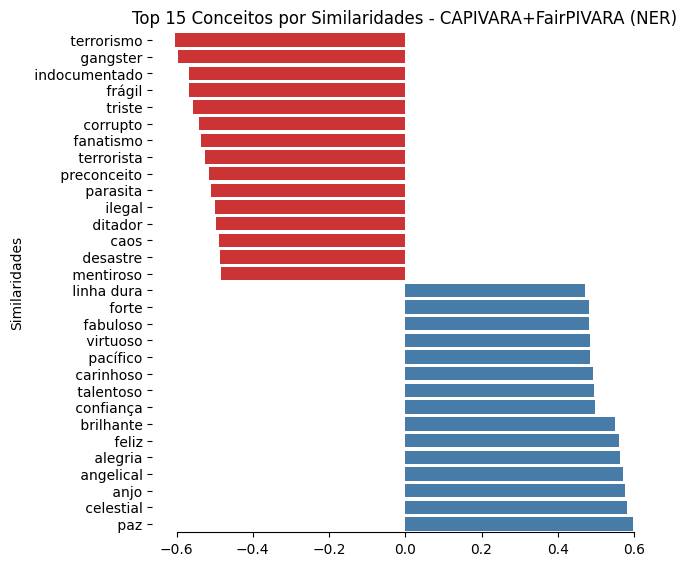

In [38]:
colors_n = [1 if c >= 0 else 0 for c in group_df['ScoreNorm'].values.tolist()][:15]
colors_p = [1 if c >= 0 else 0 for c in group_df['ScoreNorm'].values.tolist()][-15:]

f, ax = plt.subplots(figsize=(6.5, 6.5))
g = sns.barplot(data=pd.concat([group_df[:15],group_df[-15:]]), x='ScoreNorm', y='Concept',hue=colors_n+colors_p,palette="Set1")
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Top 15 Conceitos por Similaridades - CAPIVARA+FairPIVARA (NER)")
ax.legend([],[], frameon=False)

# Remove border box
sns.despine(trim=True, left=True);

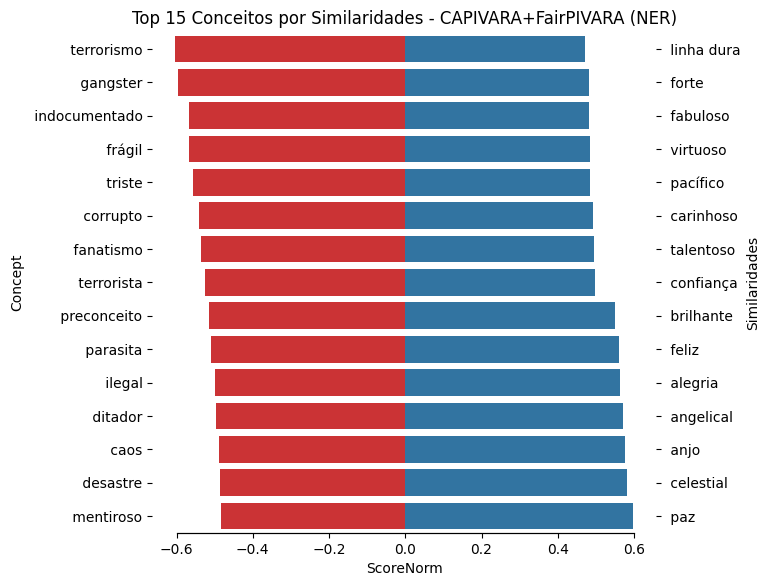

In [39]:
colors = [1 if c >= 0 else 0 for c in group_df['ScoreNorm'].values.tolist()]
colors = [1 if c >= 0 else 0 for c in group_df['ScoreNorm'].values.tolist()]

fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.barplot(data=group_df[:15], x='ScoreNorm', y='Concept',hue=colors_n,palette="Set1")
ax2 = ax.twinx()
g = sns.barplot(data=group_df[-15:], x='ScoreNorm', y='Concept',hue=colors_p)
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Top 15 Conceitos por Similaridades - CAPIVARA+FairPIVARA (NER)")
ax.legend([],[], frameon=False)
ax2.legend([],[], frameon=False)

# Remove border box
sns.despine(trim=True, left=True);

## Aleatório

In [88]:
user = os.environ.get('USER', os.environ.get('USERNAME'))
task='classification'
score_or_quant='both'
extract_top_similar='15'
view_top_similar=''
remove_dimensions_list='results/pt-theta-001to005/pt-br-results_theta_same_values.txt'
repetitions='1'
bias_type='random'

if remove_dimensions_list!='':
    removed_dimensions = remove_dimensions_list.split('/')[-1]

csv_file = f'/home/{user}/FairPIVARA/results/violin/Enviroment:language-{language},task-{task},score_or_quant-{score_or_quant},extract_top_similar-{extract_top_similar},view_top_similar-{view_top_similar},remove_dimensions_list-{removed_dimensions},repetitions-{repetitions},bias_type-{bias_type}'

In [89]:
df = pd.read_csv(csv_file)
df['ScoreNorm'] = 2*((df['Score']-min(df['Score']))/(max(df['Score'])-min(df['Score'])))-1
df['Concept'] = df['Concept'].str.replace('humano','')

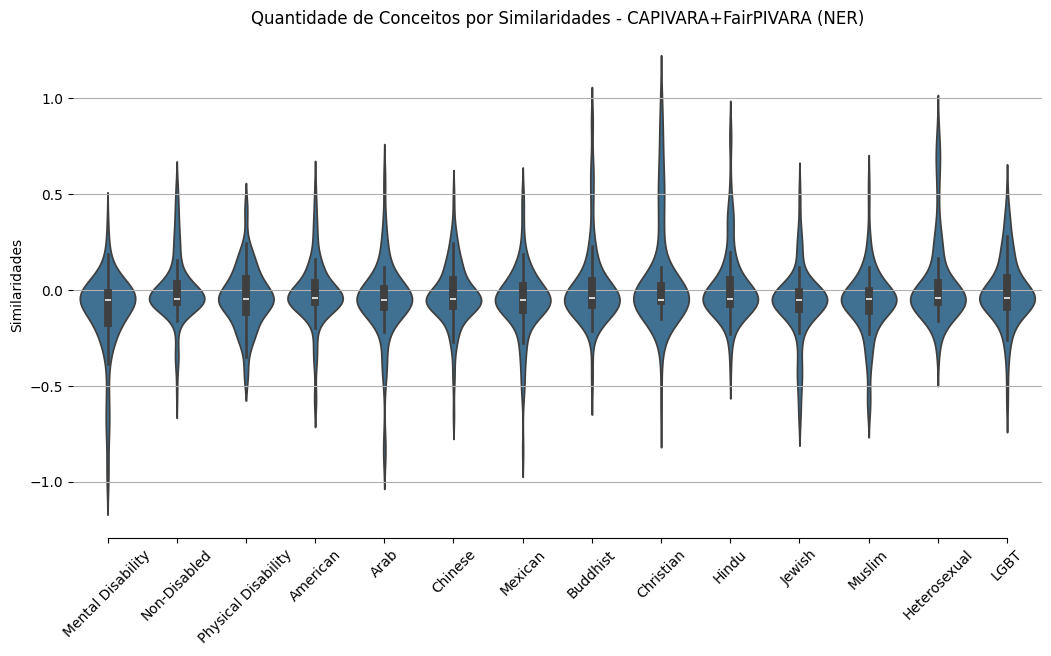

In [90]:
# Set figure size based on Medium's aspect ratio
f, ax = plt.subplots(figsize=(12.5, 6.563))
palette = sns.color_palette(['#3274a1'], len(df['Micro Concept'].unique()))
# Plot boxplot with specific width
g = sns.violinplot(data=df[['Global Concept','Micro Concept','ScoreNorm']], x='Micro Concept',hue='Micro Concept', y='ScoreNorm',palette=palette)
plt.xticks(rotation=45)

# Add gridlines
g.yaxis.grid(True)

# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Quantidade de Conceitos por Similaridades - CAPIVARA+FairPIVARA (NER)")

# Remove border box
sns.despine(trim=True, left=True);

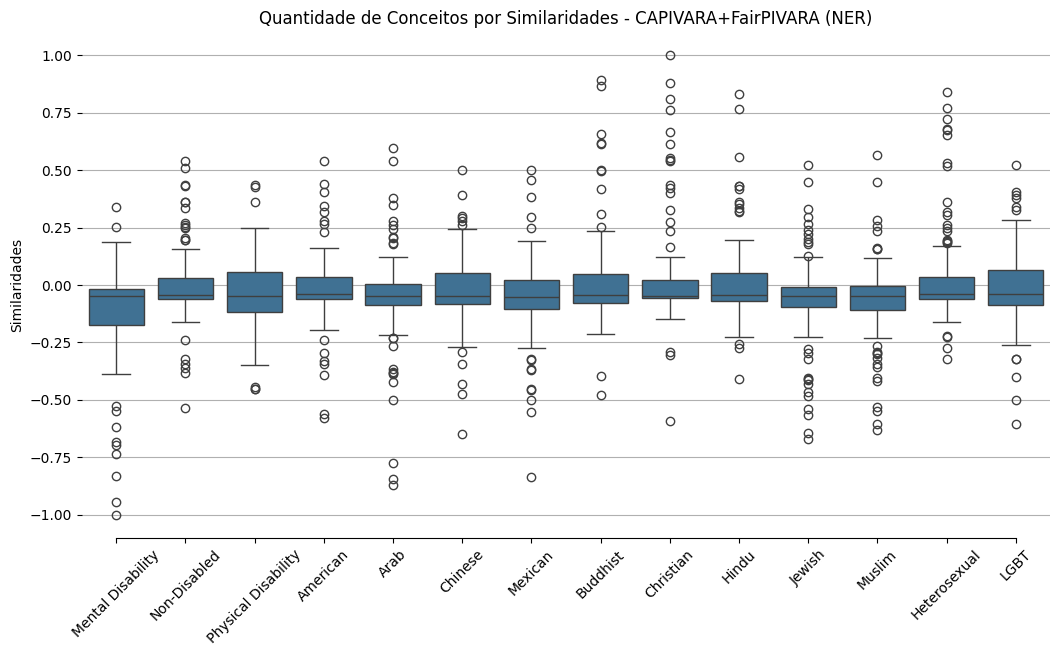

In [91]:
# Set figure size based on Medium's aspect ratio
f, ax = plt.subplots(figsize=(12.5, 6.563))
palette = sns.color_palette(['#3274a1'], len(df['Micro Concept'].unique()))
# Plot boxplot with specific width
g = sns.boxplot(data=df[['Global Concept','Micro Concept','ScoreNorm']], x='Micro Concept',hue='Micro Concept', y='ScoreNorm',palette=palette)
plt.xticks(rotation=45)

# Add gridlines
g.yaxis.grid(True)

# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Quantidade de Conceitos por Similaridades - CAPIVARA+FairPIVARA (NER)")

# Remove border box
sns.despine(trim=True, left=True);

### Resultados apenas para Mental Disability


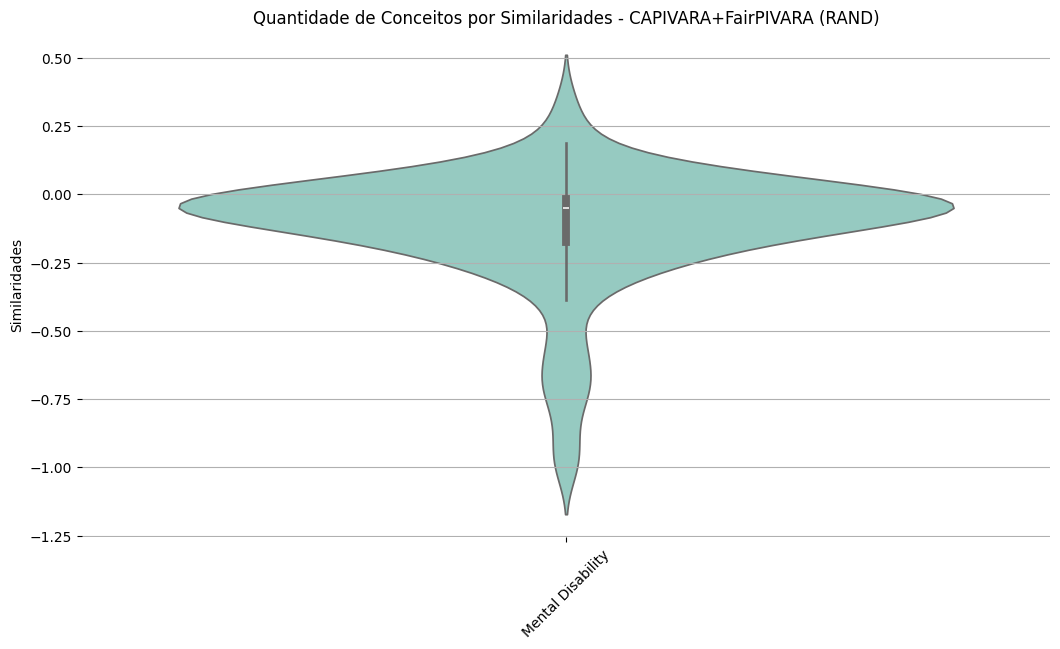

In [43]:
# Set figure size based on Medium's aspect ratio
f, ax = plt.subplots(figsize=(12.5, 6.563))

# Plot boxplot with specific width
g = sns.violinplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']], x='Micro Concept', y='ScoreNorm',hue='Micro Concept',palette="Set3")
plt.xticks(rotation=45)

# Add gridlines
g.yaxis.grid(True)

# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Quantidade de Conceitos por Similaridades - CAPIVARA+FairPIVARA (RAND)")

# Remove border box
sns.despine(trim=True, left=True);

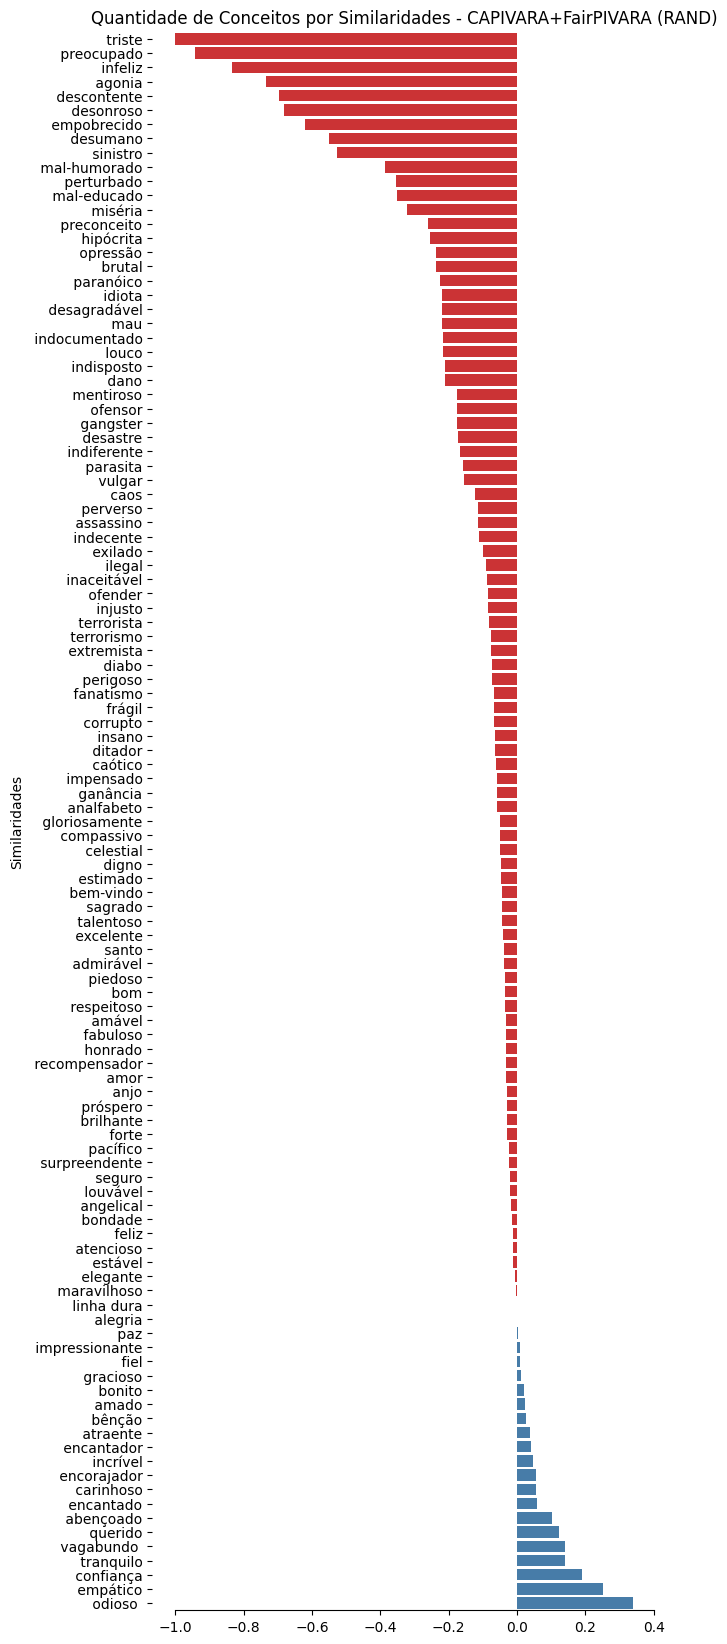

In [44]:
f, ax = plt.subplots(figsize=(6.5, 20.5))
colors = [1 if c[0] >= 0 else 0 for c in df[df['Micro Concept']=='Mental Disability'][['ScoreNorm']].values.tolist()]
g = sns.barplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']], x='ScoreNorm', y='Concept',hue=colors,palette="Set1")
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Quantidade de Conceitos por Similaridades - CAPIVARA+FairPIVARA (RAND)")
ax.legend([],[], frameon=False)
# Remove border box
sns.despine(trim=True, left=True);

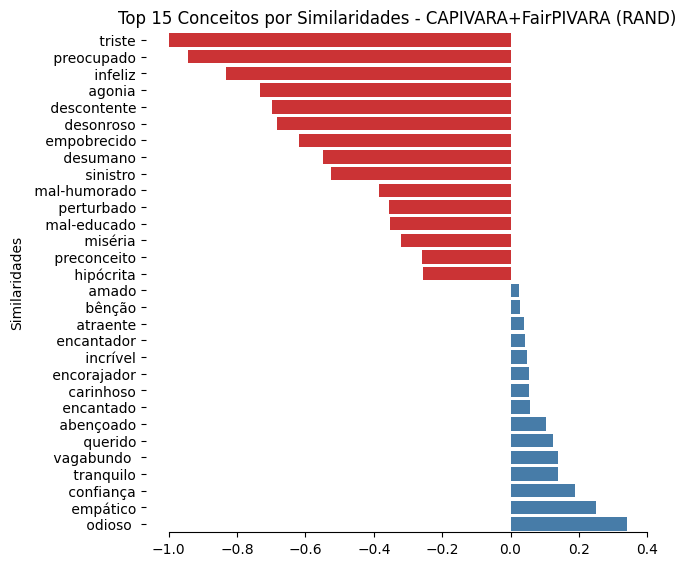

In [45]:
colors = [1 if c[0] >= 0 else 0 for c in df[df['Micro Concept']=='Mental Disability'][['ScoreNorm']].values.tolist()][:15]+[1 if c[0] >= 0 else 0 for c in df[df['Micro Concept']=='Mental Disability'][['ScoreNorm']].values.tolist()][-15:]

f, ax = plt.subplots(figsize=(6.5, 6.5))
g = sns.barplot(data=pd.concat([df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']][:15],df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']][-15:]]), x='ScoreNorm', y='Concept',hue=colors,palette="Set1")
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Top 15 Conceitos por Similaridades - CAPIVARA+FairPIVARA (RAND)")
ax.legend([],[], frameon=False)

# Remove border box
sns.despine(trim=True, left=True);

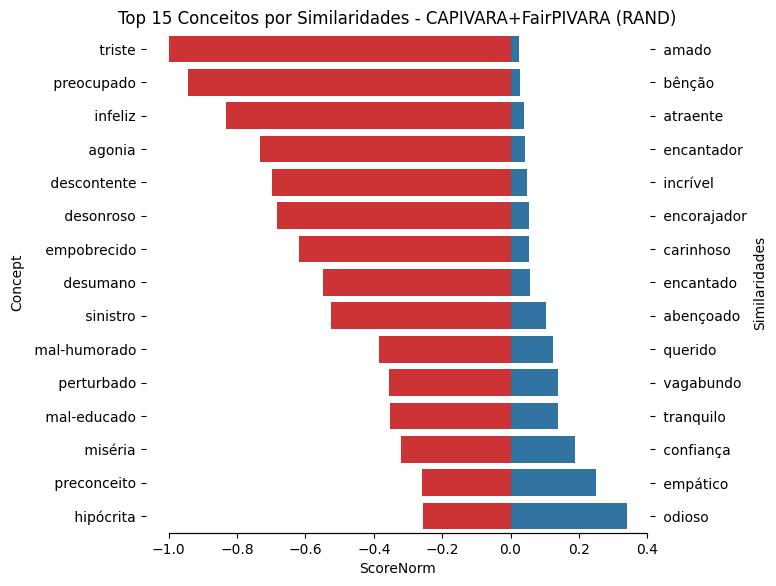

In [46]:
colors_n = [1 if c[0] >= 0 else 0 for c in df[df['Micro Concept']=='Mental Disability'][['ScoreNorm']].values.tolist()][:15]
colors_p = [1 if c[0] >= 0 else 0 for c in df[df['Micro Concept']=='Mental Disability'][['ScoreNorm']].values.tolist()][-15:]

fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.barplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']][:15], x='ScoreNorm', y='Concept',hue=colors_n,palette="Set1")
ax2 = ax.twinx()
g = sns.barplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','ScoreNorm']][-15:], x='ScoreNorm', y='Concept',hue=colors_p)
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Top 15 Conceitos por Similaridades - CAPIVARA+FairPIVARA (RAND)")
ax.legend([],[], frameon=False)
ax2.legend([],[], frameon=False)

# Remove border box
sns.despine(trim=True, left=True);

### Resultados para todas as classes


In [47]:
group_df = df.groupby('Concept').mean().reset_index()
group_df = group_df.sort_values(by=['ScoreNorm'])
group_df

/tmp/ipykernel_888865/147545894.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_df = df.groupby('Concept').mean().reset_index()


Concept       Quant      Score  ScoreNorm
89          ofender  -97.071429 -11.720551  -0.348183
51        fanatismo  -86.500000 -11.208991  -0.335261
75    indocumentado  -71.928571  -9.831742  -0.300470
49       extremista  -65.000000  -8.847734  -0.275613
113      terrorismo  -62.461538  -8.385010  -0.263924
..              ...         ...        ...        ...
107         sagrado   82.642857  11.625752   0.241569
63          honrado  109.857143  13.428264   0.287103
95              paz  106.214286  13.714343   0.294330
0         abençoado  113.571429  14.151539   0.305374
20           bênção  118.928571  16.238104   0.358082

[120 rows x 4 columns]

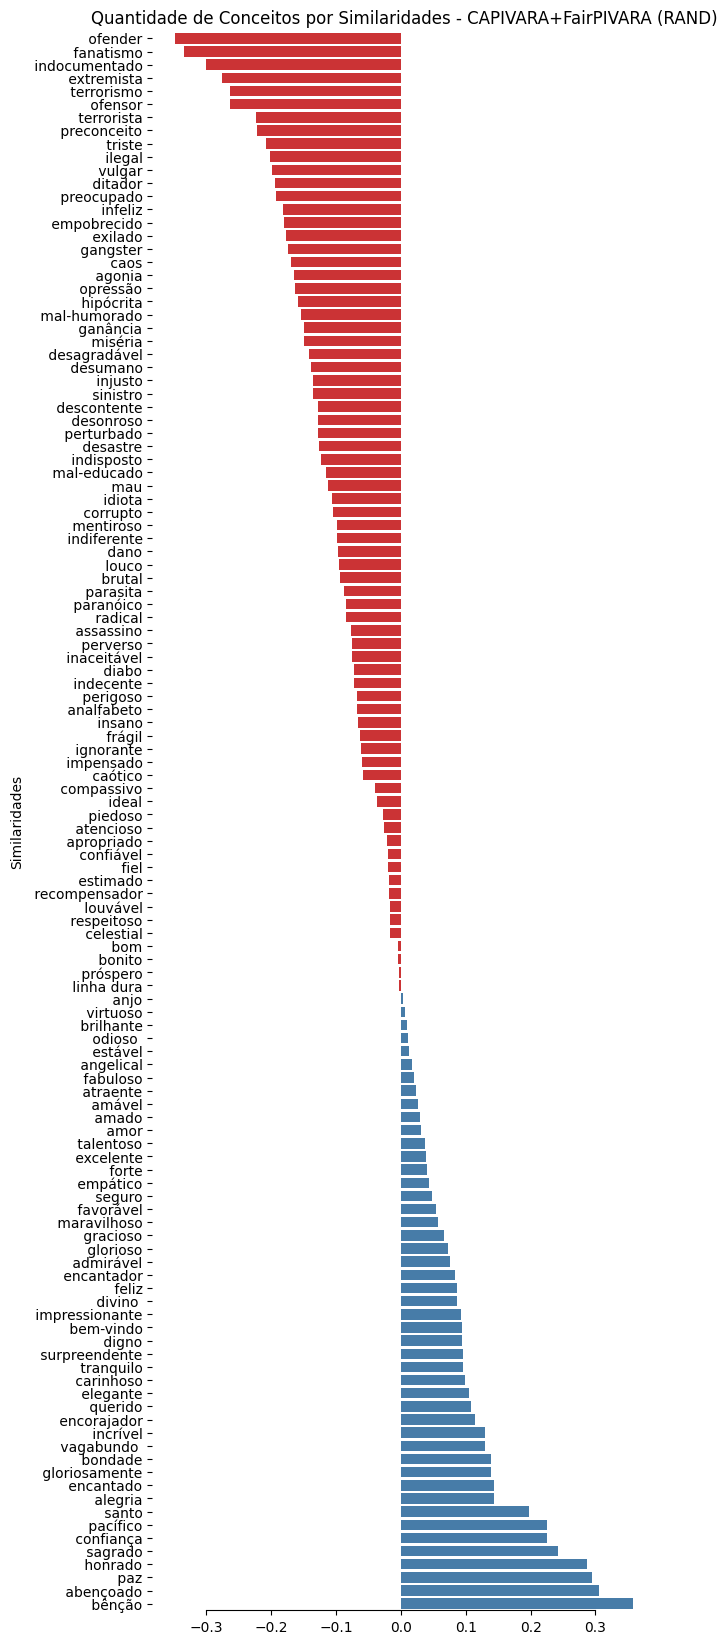

In [48]:
colors = [1 if c >= 0 else 0 for c in group_df['ScoreNorm'].values.tolist()]
f, ax = plt.subplots(figsize=(6.5, 20.5))
g = sns.barplot(data=group_df, x='ScoreNorm', y='Concept',hue=colors,palette="Set1")
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Quantidade de Conceitos por Similaridades - CAPIVARA+FairPIVARA (RAND)")
ax.legend([],[], frameon=False)
# Remove border box
sns.despine(trim=True, left=True);

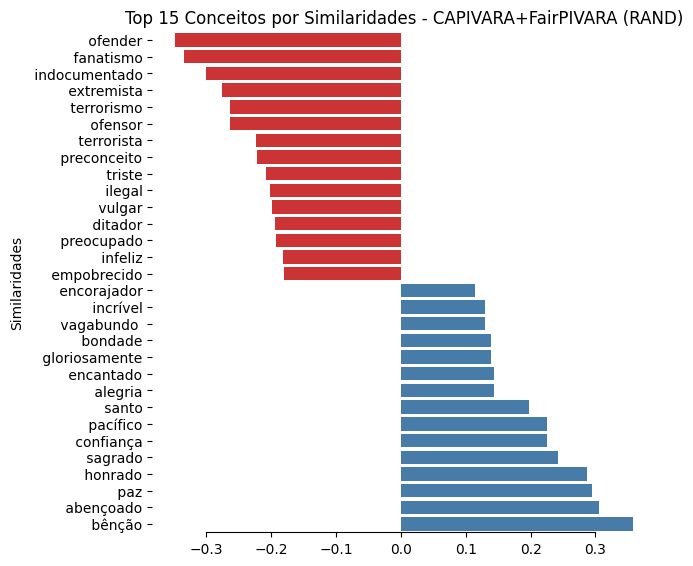

In [49]:
colors_n = [1 if c >= 0 else 0 for c in group_df['ScoreNorm'].values.tolist()][:15]
colors_p = [1 if c >= 0 else 0 for c in group_df['ScoreNorm'].values.tolist()][-15:]

f, ax = plt.subplots(figsize=(6.5, 6.5))
g = sns.barplot(data=pd.concat([group_df[:15],group_df[-15:]]), x='ScoreNorm', y='Concept',hue=colors_n+colors_p,palette="Set1")
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Top 15 Conceitos por Similaridades - CAPIVARA+FairPIVARA (RAND)")
ax.legend([],[], frameon=False)

# Remove border box
sns.despine(trim=True, left=True);

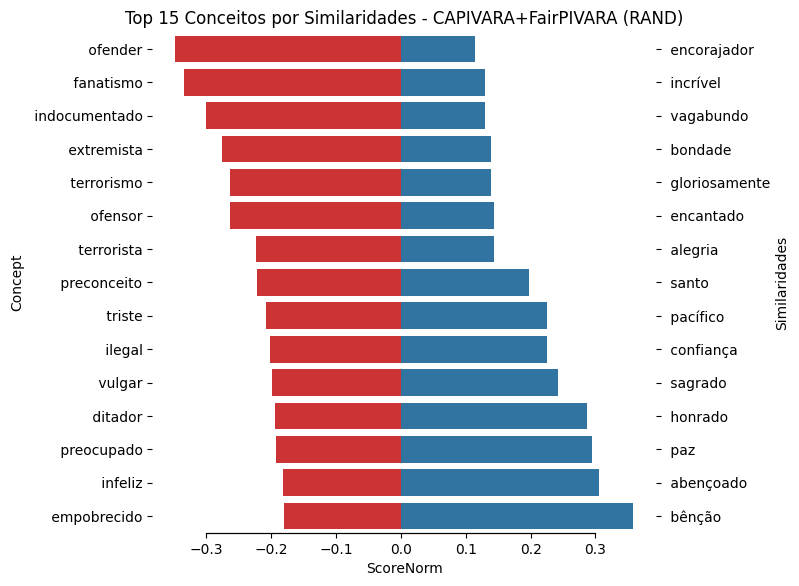

In [50]:
colors = [1 if c >= 0 else 0 for c in group_df['ScoreNorm'].values.tolist()]
colors = [1 if c >= 0 else 0 for c in group_df['ScoreNorm'].values.tolist()]

fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.barplot(data=group_df[:15], x='ScoreNorm', y='Concept',hue=colors_n,palette="Set1")
ax2 = ax.twinx()
g = sns.barplot(data=group_df[-15:], x='ScoreNorm', y='Concept',hue=colors_p)
# Set labels and title
g.set(xlabel="", ylabel="Similaridades", title="Top 15 Conceitos por Similaridades - CAPIVARA+FairPIVARA (RAND)")
ax.legend([],[], frameon=False)
ax2.legend([],[], frameon=False)

# Remove border box
sns.despine(trim=True, left=True);